In [1]:
# --- diagnostics for the torchtune / torchao issue --------------------------
import sys, platform, importlib, traceback, inspect, textwrap

def try_import(name: str):
    """Attempt to import a module and report the result."""
    try:
        mod = importlib.import_module(name)
        version = getattr(mod, "__version__", "unknown")
        print(f"✅  {name} imported (version={version})")
        return mod
    except Exception as e:
        print(f"❌  failed to import '{name}': {type(e).__name__}: {e}")
        traceback.print_exc(limit=2)
        return None

print("=" * 79)
print(f"Python: {sys.version}")
print(f"Platform: {platform.platform()}")
print("=" * 79)

# 1. Core libraries ----------------------------------------------------------
torch = try_import("torch")
torchtune = try_import("torchtune")
torchao = try_import("torchao")  # the one causing trouble

# 2. If torchtune is present, probe for the scheduler symbol -----------------
if torchtune is not None:
    try:
        from torchtune.modules import get_cosine_schedule_with_warmup
        print("✅  torchtune.modules.get_cosine_schedule_with_warmup is importable")
        # show the first few lines of its source so we know where it lives
        src = inspect.getsource(get_cosine_schedule_with_warmup)
        print("\nSource snippet:\n")
        print(textwrap.indent("\n".join(src.splitlines()[:20]), "    "))
    except Exception as e:
        print(f"❌  Could not import the scheduler: {type(e).__name__}: {e}")
        traceback.print_exc(limit=2)

# 3. Extra: show CUDA / compiler info if torch is present --------------------
if torch is not None:
    print("=" * 79)
    print(f"torch version  : {torch.__version__}")
    print(f"CUDA available : {torch.cuda.is_available()}")
    print(f"CUDA toolkit   : {torch.version.cuda}")
    if torch.cuda.is_available():
        print(f"GPU name       : {torch.cuda.get_device_name(0)}")

print("\n(End of diagnostics)")

Python: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
Platform: Windows-11-10.0.26100-SP0
✅  torch imported (version=2.7.1+cpu)
❌  failed to import 'torchtune': ImportError: 
        torchao not installed.
        Please follow the instructions at https://pytorch.org/torchtune/main/install.html#pre-requisites
        to install torchao.
        
❌  failed to import 'torchao': ModuleNotFoundError: No module named 'torchao'
torch version  : 2.7.1+cpu
CUDA available : False
CUDA toolkit   : None

(End of diagnostics)


Traceback (most recent call last):
  File "c:\Users\rfrjo\Anaconda3\Lib\site-packages\torchtune\__init__.py", line 16, in <module>
    import torchao  # noqa
    ^^^^^^^^^^^^^^
ModuleNotFoundError: No module named 'torchao'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\rfrjo\AppData\Local\Temp\ipykernel_20408\2517077448.py", line 7, in try_import
    mod = importlib.import_module(name)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rfrjo\Anaconda3\Lib\importlib\__init__.py", line 90, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ImportError: 
        torchao not installed.
        Please follow the instructions at https://pytorch.org/torchtune/main/install.html#pre-requisites
        to install torchao.
        
Traceback (most recent call last):
  File "C:\Users\rfrjo\AppData\Local\Temp\ipykernel_20408

In [1]:
import pickle
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load the pickle file
file_path = r'C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\ic_count.pkl'

# Alternative relative path if running from the project root
# file_path = 'data/ic_count.pkl'

try:
    with open(file_path, 'rb') as f:
        ic_count_data = pickle.load(f)
    
    print("✅ Successfully loaded pickle file!")
    print(f"Data type: {type(ic_count_data)}")
    print(f"Data shape/length: {len(ic_count_data) if hasattr(ic_count_data, '__len__') else 'N/A'}")
    
except Exception as e:
    print(f"❌ Error loading file: {e}")
    ic_count_data = None

# Analyze the data structure
if ic_count_data is not None:
    print("\n" + "="*50)
    print("DATA STRUCTURE ANALYSIS")
    print("="*50)
    
    # Check if it's a dictionary
    if isinstance(ic_count_data, dict):
        print("📊 Data is a dictionary")
        print(f"Number of keys: {len(ic_count_data)}")
        print(f"First 10 keys: {list(ic_count_data.keys())[:10]}")
        
        # Analyze values
        if ic_count_data:
            first_key = list(ic_count_data.keys())[0]
            first_value = ic_count_data[first_key]
            print(f"Type of values: {type(first_value)}")
            print(f"Sample value: {first_value}")
            
            # If values are numeric, show statistics
            if isinstance(first_value, (int, float)):
                values = list(ic_count_data.values())
                print(f"Value statistics:")
                print(f"  Min: {min(values)}")
                print(f"  Max: {max(values)}")
                print(f"  Mean: {np.mean(values):.4f}")
                print(f"  Median: {np.median(values):.4f}")
                
    # Check if it's a list/array
    elif isinstance(ic_count_data, (list, tuple, np.ndarray)):
        print("📊 Data is a list/array")
        print(f"Length: {len(ic_count_data)}")
        if len(ic_count_data) > 0:
            print(f"First few elements: {ic_count_data[:5]}")
            print(f"Element type: {type(ic_count_data[0])}")
            
    # Check if it's a pandas object
    elif isinstance(ic_count_data, (pd.DataFrame, pd.Series)):
        print("📊 Data is a pandas object")
        print(f"Shape: {ic_count_data.shape}")
        print(f"Columns: {ic_count_data.columns.tolist() if hasattr(ic_count_data, 'columns') else 'N/A'}")
        print(f"Index: {ic_count_data.index[:5].tolist() if len(ic_count_data.index) > 0 else 'Empty'}")
        
    else:
        print(f"📊 Data is of type: {type(ic_count_data)}")
        print(f"Data preview: {str(ic_count_data)[:200]}...")

# Detailed analysis based on common IC (Information Content) patterns
print("\n" + "="*50)
print("DETAILED ANALYSIS")
print("="*50)

if ic_count_data is not None:
    # If it's likely GO term IC counts (common in bioinformatics)
    if isinstance(ic_count_data, dict):
        print("🧬 Analyzing as GO term IC counts...")
        
        # Show key patterns
        keys = list(ic_count_data.keys())
        print(f"Key patterns (first 20): {keys[:20]}")
        
        # Check if keys look like GO terms
        go_pattern_keys = [k for k in keys[:100] if isinstance(k, str) and k.startswith('GO:')]
        if go_pattern_keys:
            print(f"Found {len(go_pattern_keys)} GO-term-like keys in first 100")
            print(f"Example GO terms: {go_pattern_keys[:5]}")
            
        # Analyze value distribution
        values = list(ic_count_data.values())
        if all(isinstance(v, (int, float)) for v in values[:10]):
            print(f"\n📈 Value Distribution:")
            print(f"  Total entries: {len(values)}")
            print(f"  Unique values: {len(set(values))}")
            print(f"  Range: {min(values):.4f} to {max(values):.4f}")
            
            # Create histogram
            plt.figure(figsize=(12, 4))
            
            plt.subplot(1, 2, 1)
            plt.hist(values, bins=50, alpha=0.7, edgecolor='black')
            plt.title('Distribution of IC Values')
            plt.xlabel('IC Value')
            plt.ylabel('Frequency')
            
            plt.subplot(1, 2, 2)
            plt.boxplot(values)
            plt.title('Box Plot of IC Values')
            plt.ylabel('IC Value')
            
            plt.tight_layout()
            plt.show()
            
            # Show top and bottom values
            sorted_items = sorted(ic_count_data.items(), key=lambda x: x[1], reverse=True)
            print(f"\n🔝 Top 10 highest IC values:")
            for i, (key, value) in enumerate(sorted_items[:10]):
                print(f"  {i+1:2d}. {key}: {value:.4f}")
                
            print(f"\n🔻 Top 10 lowest IC values:")
            for i, (key, value) in enumerate(sorted_items[-10:]):
                print(f"  {i+1:2d}. {key}: {value:.4f}")

# Save analysis results
print("\n" + "="*50)
print("EXPORT OPTIONS")
print("="*50)

if ic_count_data is not None and isinstance(ic_count_data, dict):
    # Convert to DataFrame for easier analysis
    df = pd.DataFrame(list(ic_count_data.items()), columns=['Term', 'IC_Value'])
    print("📁 Data converted to DataFrame")
    print(f"DataFrame shape: {df.shape}")
    print("\nFirst few rows:")
    print(df.head())
    
    # Save to CSV for further analysis
    # df.to_csv('ic_count_analysis.csv', index=False)
    # print("💾 Data saved to 'ic_count_analysis.csv'")

print("\n✨ Analysis complete!")

✅ Successfully loaded pickle file!
Data type: <class 'dict'>
Data shape/length: 3

DATA STRUCTURE ANALYSIS
📊 Data is a dictionary
Number of keys: 3
First 10 keys: ['mf', 'bp', 'cc']
Type of values: <class 'numpy.ndarray'>
Sample value: [  41  117   66   48  225   45   51  126  256 2538   92  486   36   58
  140   58   57   90   84  114   49    0  904  173  508   28   64   56
  170  108  599   55  313    8   26 1233  446  150  638  316   50   98
 1167   84   54  140  218  446  184   75   43  215  292   51   68  215
   97 1237   40   88   67  196  848   25   19   84   81   85  124  126
   50   90  139  103  606   76  208   40  127   76   54  446   46  111
   34  253   83   24 3006   44  497   67   55   45   47  228   54    4
 2502   53   86  111   64   36  103   39   49  648  216   41  134   17
   38   81 2937  340   76  231   39   46   27  983  658  142  524   50
   87  254  239   46 1197   49   60   32  104  641  356  941   47   35
  168   14  487   83   24   61   46   45  457   49   3

🚀 IC COUNT DIAGNOSTIC TOOL
🔍 IC COUNT ANALYSIS
✅ Successfully loaded: C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\ic_count.pkl

📊 DATA STRUCTURE:
   Type: <class 'dict'>
   Keys: ['mf', 'bp', 'cc']

🧬 MF ONTOLOGY ANALYSIS:
   📈 Basic Statistics:
      Total GO terms: 489
      Non-zero terms: 488 (99.8%)
      Zero count terms: 1
      Total count sum: 127,433
      Count range: [0, 3,350]
      Mean count: 260.6
      Median count: 97.0

   📊 Distribution Analysis (non-zero only):
      10th percentile: 36
      25th percentile: 51
      50th percentile: 97
      75th percentile: 243
      90th percentile: 601
      95th percentile: 971
      99th percentile: 2593

   📋 Frequency Brackets:
      Very Rare       (    1-10): 6 terms
      Rare            (   11-50): 112 terms
      Uncommon        (  51-100): 130 terms
      Common          ( 101-500): 182 terms
      Frequent        (501-1000): 36 terms
      Very Frequent   (   ≥1001): 22 terms

   🧠 Count Interpretation:
    

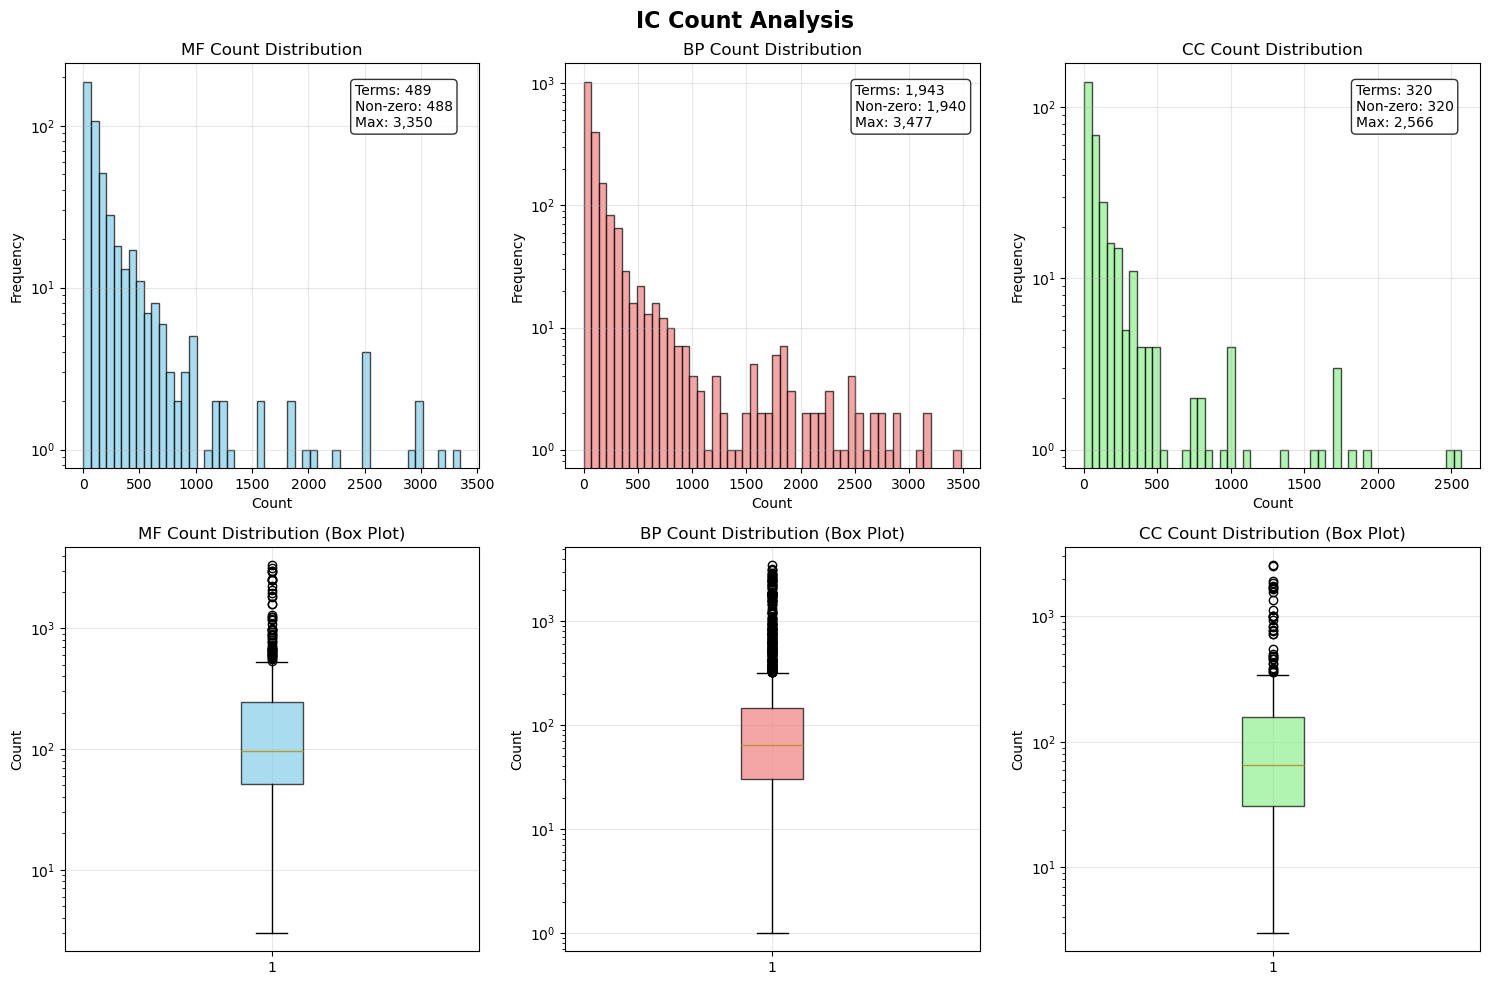


📋 SUMMARY TABLE:
Ontology Total Terms Non-Zero Terms Total Counts Max Count Mean Count Zero %
      MF         489            488      127,433     3,350      260.6   0.2%
      BP       1,943          1,940      357,370     3,477      183.9   0.2%
      CC         320            320       59,223     2,566      185.1   0.0%

💾 Saved summary to: ic_count_summary.csv

🎉 ANALYSIS COMPLETE!
   Check the generated plots and recommendations above.
🔍 IC COUNT ANALYSIS
✅ Successfully loaded: C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\ic_count.pkl

📊 DATA STRUCTURE:
   Type: <class 'dict'>
   Keys: ['mf', 'bp', 'cc']

🧬 MF ONTOLOGY ANALYSIS:
   📈 Basic Statistics:
      Total GO terms: 489
      Non-zero terms: 488 (99.8%)
      Zero count terms: 1
      Total count sum: 127,433
      Count range: [0, 3,350]
      Mean count: 260.6
      Median count: 97.0

   📊 Distribution Analysis (non-zero only):
      10th percentile: 36
      25th percentile: 51
      50th percentile: 97
      75

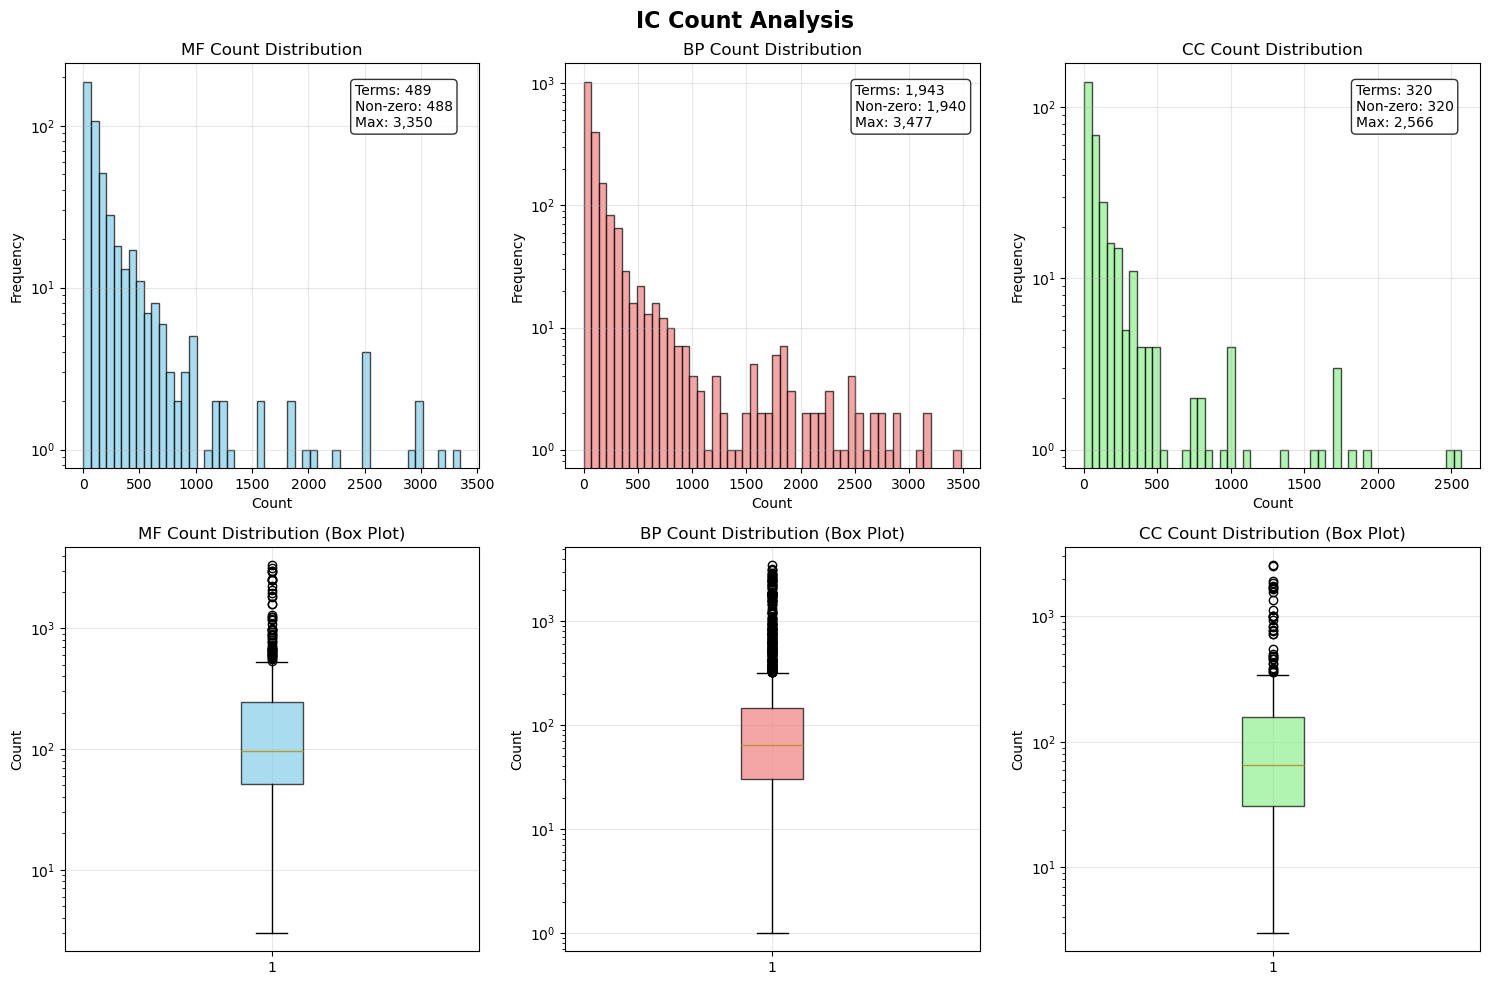


📋 SUMMARY TABLE:
Ontology Total Terms Non-Zero Terms Total Counts Max Count Mean Count Zero %
      MF         489            488      127,433     3,350      260.6   0.2%
      BP       1,943          1,940      357,370     3,477      183.9   0.2%
      CC         320            320       59,223     2,566      185.1   0.0%


{'ontology_results': {'mf': {'counts': array([  41,  117,   66,   48,  225,   45,   51,  126,  256, 2538,   92,
           486,   36,   58,  140,   58,   57,   90,   84,  114,   49,    0,
           904,  173,  508,   28,   64,   56,  170,  108,  599,   55,  313,
             8,   26, 1233,  446,  150,  638,  316,   50,   98, 1167,   84,
            54,  140,  218,  446,  184,   75,   43,  215,  292,   51,   68,
           215,   97, 1237,   40,   88,   67,  196,  848,   25,   19,   84,
            81,   85,  124,  126,   50,   90,  139,  103,  606,   76,  208,
            40,  127,   76,   54,  446,   46,  111,   34,  253,   83,   24,
          3006,   44,  497,   67,   55,   45,   47,  228,   54,    4, 2502,
            53,   86,  111,   64,   36,  103,   39,   49,  648,  216,   41,
           134,   17,   38,   81, 2937,  340,   76,  231,   39,   46,   27,
           983,  658,  142,  524,   50,   87,  254,  239,   46, 1197,   49,
            60,   32,  104,  641,  356,  941,   47, 

In [1]:
#!/usr/bin/env python3
"""
Standalone diagnostic script for analyzing ic_count.pkl
Just provide the path to the pickle file and get comprehensive analysis.

Usage:
    python ic_diagnostic.py
    # or in Jupyter:
    # analyze_heal_ic()
"""

import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pandas as pd
import os

def analyze_ic_counts(pkl_path, show_plots=True, save_plots=False):
    """
    Comprehensive analysis of HEAL's ic_count.pkl file.
    
    Args:
        pkl_path: Path to ic_count.pkl file
        show_plots: Whether to display plots
        save_plots: Whether to save plots to files
    """
    
    print("🔍 IC COUNT ANALYSIS")
    print("="*50)
    
    # Convert to Path object and resolve
    pkl_path = Path(pkl_path).resolve()
    
    # Load the pickle file
    try:
        with open(pkl_path, 'rb') as f:
            ic_data = pickle.load(f)
        print(f"✅ Successfully loaded: {pkl_path}")
    except FileNotFoundError:
        print(f"❌ File not found: {pkl_path}")
        print(f"Current working directory: {os.getcwd()}")
        print("Available files in current directory:")
        try:
            for f in os.listdir('.'):
                print(f"  - {f}")
        except:
            pass
        return None
    except Exception as e:
        print(f"❌ Error loading file: {e}")
        return None
    
    # Basic structure analysis
    print(f"\n📊 DATA STRUCTURE:")
    print(f"   Type: {type(ic_data)}")
    
    if isinstance(ic_data, dict):
        print(f"   Keys: {list(ic_data.keys())}")
        
        results = {}
        
        for ont in ['mf', 'bp', 'cc']:
            if ont in ic_data:
                counts = np.array(ic_data[ont])
                results[ont] = analyze_ontology_counts(ont, counts)
            else:
                print(f"   ⚠️ Key '{ont}' not found in data")
        
        if not results:
            print("   ❌ No recognized ontology keys found")
            print(f"   Available keys: {list(ic_data.keys())}")
            return None
        
        # Cross-ontology analysis
        cross_analysis = analyze_cross_ontology_patterns(results)
        
        # Generate recommendations
        recommendations = generate_ic_recommendations(results, cross_analysis)
        
        # Create visualizations
        if show_plots or save_plots:
            create_ic_visualizations(results, show_plots, save_plots)
        
        return {
            'ontology_results': results,
            'cross_analysis': cross_analysis,
            'recommendations': recommendations
        }
    
    else:
        print(f"   Unexpected data type: {type(ic_data)}")
        print(f"   Data preview: {str(ic_data)[:200]}...")
        return None

def analyze_ontology_counts(ontology, counts):
    """Analyze counts for a single ontology."""
    
    print(f"\n🧬 {ontology.upper()} ONTOLOGY ANALYSIS:")
    print(f"   {'='*30}")
    
    # Basic statistics
    stats = {
        'total_terms': len(counts),
        'non_zero_terms': np.sum(counts > 0),
        'zero_terms': np.sum(counts == 0),
        'total_count_sum': int(np.sum(counts)),
        'min_count': int(np.min(counts)),
        'max_count': int(np.max(counts)),
        'mean_count': float(np.mean(counts)),
        'median_count': float(np.median(counts)),
        'std_count': float(np.std(counts))
    }
    
    print(f"   📈 Basic Statistics:")
    print(f"      Total GO terms: {stats['total_terms']:,}")
    print(f"      Non-zero terms: {stats['non_zero_terms']:,} ({100*stats['non_zero_terms']/stats['total_terms']:.1f}%)")
    print(f"      Zero count terms: {stats['zero_terms']:,}")
    print(f"      Total count sum: {stats['total_count_sum']:,}")
    print(f"      Count range: [{stats['min_count']}, {stats['max_count']:,}]")
    print(f"      Mean count: {stats['mean_count']:.1f}")
    print(f"      Median count: {stats['median_count']:.1f}")
    
    # Distribution analysis
    non_zero_counts = counts[counts > 0]
    
    if len(non_zero_counts) > 0:
        print(f"\n   📊 Distribution Analysis (non-zero only):")
        percentiles = [10, 25, 50, 75, 90, 95, 99]
        for p in percentiles:
            val = np.percentile(non_zero_counts, p)
            print(f"      {p:2d}th percentile: {val:.0f}")
    
    # Frequency analysis
    print(f"\n   📋 Frequency Brackets:")
    brackets = [
        (1, 10, "Very Rare"),
        (11, 50, "Rare"), 
        (51, 100, "Uncommon"),
        (101, 500, "Common"),
        (501, 1000, "Frequent"),
        (1001, float('inf'), "Very Frequent")
    ]
    
    for min_val, max_val, label in brackets:
        if max_val == float('inf'):
            mask = counts >= min_val
            range_str = f"≥{min_val}"
        else:
            mask = (counts >= min_val) & (counts <= max_val)
            range_str = f"{min_val}-{max_val}"
        
        count_in_bracket = np.sum(mask)
        if count_in_bracket > 0:
            print(f"      {label:<15} ({range_str:>8}): {count_in_bracket:,} terms")
    
    # Try to infer what the counts represent
    interpretation = interpret_count_patterns(stats)
    print(f"\n   🧠 Count Interpretation:")
    for interp in interpretation:
        print(f"      {interp}")
    
    return {
        'counts': counts,
        'stats': stats,
        'interpretation': interpretation
    }

def interpret_count_patterns(stats):
    """Try to interpret what the count patterns suggest."""
    interpretations = []
    
    total_sum = stats['total_count_sum']
    mean_count = stats['mean_count']
    max_count = stats['max_count']
    
    # Pattern recognition
    if 60000 <= total_sum <= 80000:
        interpretations.append("✅ Total suggests ~69k protein annotations (matches HEAL)")
    elif 30000 <= total_sum <= 40000:
        interpretations.append("📊 Total suggests ~32k protein annotations (PDBch subset)")
    elif 200000 <= total_sum <= 300000:
        interpretations.append("📊 Total suggests ~244k protein annotations (AFch subset)")
    elif total_sum > 500000:
        interpretations.append("⚠️ Very high total - might include hierarchical propagation")
    else:
        interpretations.append(f"❓ Unusual total count ({total_sum:,}) - unclear methodology")
    
    if mean_count < 2:
        interpretations.append("📈 Low mean count suggests specific/rare annotations")
    elif mean_count > 10:
        interpretations.append("📈 High mean count suggests broad annotations or propagation")
    
    if max_count > 10000:
        interpretations.append("📈 Very high max count suggests root/common terms")
    
    # Sparsity analysis
    zero_ratio = stats['zero_terms'] / stats['total_terms']
    if zero_ratio > 0.5:
        interpretations.append(f"🕳️ High sparsity ({zero_ratio:.1%} zeros) - many unused terms")
    elif zero_ratio < 0.1:
        interpretations.append(f"📊 Low sparsity ({zero_ratio:.1%} zeros) - most terms used")
    
    return interpretations

def analyze_cross_ontology_patterns(results):
    """Analyze patterns across ontologies."""
    
    print(f"\n🔄 CROSS-ONTOLOGY ANALYSIS:")
    print(f"   {'='*25}")
    
    cross_stats = {}
    
    # Compare total counts
    print(f"   📊 Total Count Comparison:")
    for ont in ['mf', 'bp', 'cc']:
        if ont in results:
            total = results[ont]['stats']['total_count_sum']
            terms = results[ont]['stats']['total_terms']
            print(f"      {ont.upper()}: {total:,} total counts, {terms:,} terms")
            cross_stats[ont] = {'total_counts': total, 'total_terms': terms}
    
    # Calculate ratios
    if len(cross_stats) >= 2:
        print(f"\n   📈 Ratios and Patterns:")
        
        # BP is usually the largest
        if 'bp' in cross_stats and 'mf' in cross_stats:
            bp_to_mf_ratio = cross_stats['bp']['total_counts'] / cross_stats['mf']['total_counts']
            print(f"      BP/MF count ratio: {bp_to_mf_ratio:.2f}")
            
            if 1.5 <= bp_to_mf_ratio <= 4.0:
                print(f"      ✅ Normal BP/MF ratio (biological processes > molecular functions)")
            else:
                print(f"      ⚠️ Unusual BP/MF ratio")
        
        # Check if patterns are consistent with protein annotation
        total_all = sum(stats['total_counts'] for stats in cross_stats.values())
        avg_annotations_per_protein = total_all / 69709  # Assume HEAL's dataset
        
        print(f"      Average annotations per protein (assuming 69k): {avg_annotations_per_protein:.1f}")
        
        if 0.5 <= avg_annotations_per_protein <= 3.0:
            print(f"      ✅ Reasonable annotation density")
        else:
            print(f"      ⚠️ Unusual annotation density")
    
    return cross_stats

def generate_ic_recommendations(results, cross_analysis):
    """Generate recommendations for IC calculation."""
    
    print(f"\n💡 IC CALCULATION RECOMMENDATIONS:")
    print(f"   {'='*30}")
    
    recommendations = []
    
    # Analyze total counts to infer dataset
    total_counts = sum(r['stats']['total_count_sum'] for r in results.values())
    
    if 180000 <= total_counts <= 220000:
        # Matches HEAL combined dataset
        recommendations.append("🎯 Dataset: Likely HEAL's combined (PDBch + AFch)")
        recommendations.append("✅ IC Method: Use HEAL's exact calculation: IC = -log2(counts / 69709)")
        dataset_type = "heal_combined"
        
    elif 80000 <= total_counts <= 120000:
        # Matches PDBch subset
        recommendations.append("🎯 Dataset: Likely HEAL's PDBch subset")
        recommendations.append("✅ IC Method: Use adjusted calculation: IC = -log2(counts / 32641)")
        recommendations.append("🔬 Alternative: IC = -log2(counts / your_actual_training_size)")
        dataset_type = "heal_pdbch"
        
    elif 600000 <= total_counts <= 800000:
        # Matches AFch subset  
        recommendations.append("🎯 Dataset: Likely HEAL's AFch subset")
        recommendations.append("✅ IC Method: Use adjusted calculation: IC = -log2(counts / 244775)")
        dataset_type = "heal_afch"
        
    else:
        recommendations.append("🎯 Dataset: Custom or unknown")
        recommendations.append("✅ IC Method: Compute from your training data")
        recommendations.append("🔬 Alternative: Use global estimate: IC = -log2(counts / 500000)")
        dataset_type = "custom"
    
    # Add validation recommendations
    recommendations.append("\n🧪 Validation Steps:")
    recommendations.append("   1. Compute IC using recommended method")
    recommendations.append("   2. Test S-min calculation on small sample")
    recommendations.append("   3. Check S-min values are in range [0, 2]")
    recommendations.append("   4. Compare with HEAL's published metrics if possible")
    
    # Add uncertainty warnings
    recommendations.append("\n⚠️ Remaining Uncertainties:")
    recommendations.append("   • GO hierarchy propagation method unknown")
    recommendations.append("   • Evidence code filtering unclear") 
    recommendations.append("   • Temporal annotation differences possible")
    
    # Print recommendations
    for rec in recommendations:
        print(f"   {rec}")
    
    return {
        'dataset_type': dataset_type,
        'recommendations': recommendations
    }

def create_ic_visualizations(results, show_plots=True, save_plots=False):
    """Create visualizations of IC count distributions."""
    
    print(f"\n📊 CREATING VISUALIZATIONS:")
    
    try:
        # Set up the plot style
        plt.style.use('default')
        sns.set_palette("husl")
        
        # Create figure with subplots
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        fig.suptitle('IC Count Analysis', fontsize=16, fontweight='bold')
        
        ontologies = ['mf', 'bp', 'cc']
        colors = ['skyblue', 'lightcoral', 'lightgreen']
        
        # Row 1: Histograms
        for i, ont in enumerate(ontologies):
            if ont in results:
                counts = results[ont]['counts']
                non_zero_counts = counts[counts > 0]
                
                if len(non_zero_counts) > 0:
                    axes[0, i].hist(non_zero_counts, bins=50, alpha=0.7, color=colors[i], edgecolor='black')
                    axes[0, i].set_title(f'{ont.upper()} Count Distribution')
                    axes[0, i].set_xlabel('Count')
                    axes[0, i].set_ylabel('Frequency')
                    axes[0, i].set_yscale('log')  # Log scale for better visualization
                    axes[0, i].grid(True, alpha=0.3)
                    
                    # Add statistics
                    stats_text = f"Terms: {len(counts):,}\nNon-zero: {len(non_zero_counts):,}\nMax: {counts.max():,}"
                    axes[0, i].text(0.7, 0.95, stats_text, transform=axes[0, i].transAxes,
                                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
                else:
                    axes[0, i].text(0.5, 0.5, f'No data for {ont.upper()}', 
                                   transform=axes[0, i].transAxes, ha='center', va='center')
            else:
                axes[0, i].text(0.5, 0.5, f'{ont.upper()} not found', 
                               transform=axes[0, i].transAxes, ha='center', va='center')
        
        # Row 2: Box plots
        for i, ont in enumerate(ontologies):
            if ont in results:
                counts = results[ont]['counts']
                non_zero_counts = counts[counts > 0]
                
                if len(non_zero_counts) > 0:
                    # Box plot
                    axes[1, i].boxplot(non_zero_counts, patch_artist=True, 
                                      boxprops=dict(facecolor=colors[i], alpha=0.7))
                    axes[1, i].set_title(f'{ont.upper()} Count Distribution (Box Plot)')
                    axes[1, i].set_ylabel('Count')
                    axes[1, i].set_yscale('log')
                    axes[1, i].grid(True, alpha=0.3)
                else:
                    axes[1, i].text(0.5, 0.5, f'No data for {ont.upper()}', 
                                   transform=axes[1, i].transAxes, ha='center', va='center')
            else:
                axes[1, i].text(0.5, 0.5, f'{ont.upper()} not found', 
                               transform=axes[1, i].transAxes, ha='center', va='center')
        
        plt.tight_layout()
        
        if save_plots:
            plt.savefig('ic_count_analysis.png', dpi=300, bbox_inches='tight')
            print(f"   💾 Saved plot to: ic_count_analysis.png")
        
        if show_plots:
            plt.show()
        else:
            plt.close()
        
        # Create summary table
        create_summary_table(results, save_plots)
        
    except Exception as e:
        print(f"   ❌ Error creating visualizations: {e}")

def create_summary_table(results, save_table=False):
    """Create a summary table of IC count statistics."""
    
    print(f"\n📋 SUMMARY TABLE:")
    
    table_data = []
    for ont in ['mf', 'bp', 'cc']:
        if ont in results:
            stats = results[ont]['stats']
            table_data.append({
                'Ontology': ont.upper(),
                'Total Terms': f"{stats['total_terms']:,}",
                'Non-Zero Terms': f"{stats['non_zero_terms']:,}",
                'Total Counts': f"{stats['total_count_sum']:,}",
                'Max Count': f"{stats['max_count']:,}",
                'Mean Count': f"{stats['mean_count']:.1f}",
                'Zero %': f"{100*stats['zero_terms']/stats['total_terms']:.1f}%"
            })
    
    if table_data:
        df = pd.DataFrame(table_data)
        print(df.to_string(index=False))
        
        if save_table:
            df.to_csv('ic_count_summary.csv', index=False)
            print(f"\n💾 Saved summary to: ic_count_summary.csv")

# Main execution function
def main():
    """Main function for standalone execution."""
    
    print("🚀 IC COUNT DIAGNOSTIC TOOL")
    print("="*50)
    
    # Try multiple possible paths
    possible_paths = [
        "data/ic_count.pkl",
        "../data/ic_count.pkl", 
        "../../data/ic_count.pkl",
        r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\ic_count.pkl"
    ]
    
    pkl_path = None
    for path in possible_paths:
        if Path(path).exists():
            pkl_path = path
            break
    
    if pkl_path is None:
        print("❌ Could not find ic_count.pkl in any of these locations:")
        for path in possible_paths:
            print(f"   - {path}")
        print(f"\nCurrent working directory: {os.getcwd()}")
        return
    
    # Run analysis
    results = analyze_ic_counts(pkl_path, show_plots=True, save_plots=True)
    
    if results:
        print(f"\n🎉 ANALYSIS COMPLETE!")
        print(f"   Check the generated plots and recommendations above.")
    else:
        print(f"\n❌ Analysis failed - check the file path and format.")

# For Jupyter notebook usage:
def analyze_heal_ic():
    """
    Convenient function for Jupyter notebook use.
    
    Usage in Jupyter:
        analyze_heal_ic()
    """
    # Try multiple possible paths from notebook directory
    possible_paths = [
        "../data/ic_count.pkl",  # Most likely from notebooks/ directory
        "data/ic_count.pkl",     # If running from project root
        "../../data/ic_count.pkl",  # If in subdirectory
        r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\ic_count.pkl"  # Absolute path
    ]
    
    pkl_path = None
    for path in possible_paths:
        if Path(path).exists():
            pkl_path = path
            break
    
    if pkl_path is None:
        print("❌ Could not find ic_count.pkl. Tried these paths:")
        for path in possible_paths:
            print(f"   - {path}")
        print(f"\nCurrent working directory: {os.getcwd()}")
        print("\nTry running from the project root directory or adjust the path manually.")
        return None
    
    return analyze_ic_counts(pkl_path, show_plots=True, save_plots=False)

if __name__ == "__main__":
    main()

# Just run this in a Jupyter cell:
analyze_heal_ic()

In [1]:
import os
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed
from pathlib import Path
import re
from collections import defaultdict
import threading

def read_l_csv(file_path):
    """Read L.csv file and return the length value"""
    try:
        with open(file_path, 'r') as f:
            # Skip header if present, read the first number
            lines = f.readlines()
            for line in lines:
                line = line.strip()
                if line and line.isdigit():
                    return int(line)
        return None
    except Exception as e:
        print(f"Error reading L.csv at {file_path}: {e}")
        return None

def parse_a3m_file(file_path):
    """Parse a3m file to get query sequence length and total sequence count"""
    try:
        with open(file_path, 'r') as f:
            content = f.read()
        
        # Split by '>' to get individual sequences
        sequences = content.split('>')
        sequences = [seq.strip() for seq in sequences if seq.strip()]
        
        query_sequence = ""
        total_sequences = 0
        
        for seq in sequences:
            lines = seq.split('\n')
            if not lines:
                continue
                
            header = lines[0].strip()
            sequence_lines = lines[1:]
            
            # Combine all sequence lines and remove dashes
            full_sequence = ''.join(sequence_lines).replace('-', '').replace('\n', '')
            
            if header == 'query':
                query_sequence = full_sequence
            
            if full_sequence:  # Only count if there's actual sequence content
                total_sequences += 1
        
        query_length = len(query_sequence) if query_sequence else 0
        
        return query_length, total_sequences
        
    except Exception as e:
        print(f"Error reading a3m file at {file_path}: {e}")
        return None, None

def process_protein_directory(protein_dir_path, subset_name):
    """Process a single protein directory"""
    protein_id = os.path.basename(protein_dir_path)
    
    # Read L.csv
    l_csv_path = os.path.join(protein_dir_path, 'L.csv')
    sequence_length = read_l_csv(l_csv_path)
    
    # Read a3m file
    a3m_path = os.path.join(protein_dir_path, 'final_filtered_256_stripped.a3m')
    query_length, num_sequences = parse_a3m_file(a3m_path)
    
    if sequence_length is not None and query_length is not None:
        # Calculate difference: query_length - sequence_length
        subtracted_length = query_length - sequence_length
        
        return {
            'id': protein_id,
            'subset': subset_name,
            'subtracted_length': subtracted_length,
            'sequence_length': sequence_length,
            'query_length': query_length,
            'num_sequences': num_sequences
        }
    
    return None

def find_all_protein_directories(base_path):
    """Find all protein directories across train, val, test"""
    protein_dirs = []
    base_path = Path(base_path)
    
    for subset in ['test_pdbch', 'train_pdbch', 'val_pdbch']:
        subset_path = base_path / subset
        if subset_path.exists():
            for protein_dir in subset_path.iterdir():
                if protein_dir.is_dir():
                    # Check if both L.csv and a3m file exist
                    l_csv_path = protein_dir / 'L.csv'
                    a3m_path = protein_dir / 'final_filtered_256_stripped.a3m'
                    if l_csv_path.exists() and a3m_path.exists():
                        protein_dirs.append((str(protein_dir), subset))
    
    return protein_dirs

def analyze_length_differences(base_path, max_workers=8):
    """Main function to analyze length differences with multithreading"""
    
    print("Finding all protein directories...")
    protein_dirs = find_all_protein_directories(base_path)
    print(f"Found {len(protein_dirs)} protein directories with both L.csv and a3m files")
    
    # Process all directories with multithreading
    print("Processing directories with multithreading...")
    results = []
    
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_dir = {executor.submit(process_protein_directory, protein_dir, subset): (protein_dir, subset) 
                        for protein_dir, subset in protein_dirs}
        
        for i, future in enumerate(as_completed(future_to_dir), 1):
            if i % 100 == 0:
                print(f"Processed {i}/{len(protein_dirs)} directories...")
            
            try:
                result = future.result()
                if result is not None:
                    results.append(result)
            except Exception as e:
                protein_dir, subset = future_to_dir[future]
                print(f"Error processing {protein_dir}: {e}")
    
    print(f"Successfully processed {len(results)} protein directories")
    return results

def print_summary_statistics(df):
    """Print comprehensive summary statistics"""
    print("\n" + "="*80)
    print("SEQUENCE LENGTH ANALYSIS SUMMARY")
    print("="*80)
    
    total_proteins = len(df)
    print(f"Total proteins analyzed: {total_proteins}")
    
    # Subset breakdown
    print(f"\nBreakdown by subset:")
    subset_counts = df['subset'].value_counts()
    for subset, count in subset_counts.items():
        print(f"  {subset}: {count} proteins")
    
    # Length difference statistics
    print(f"\nLength Difference Statistics (query_length - sequence_length):")
    print(f"  Mean difference: {df['subtracted_length'].mean():.2f}")
    print(f"  Median difference: {df['subtracted_length'].median():.2f}")
    print(f"  Standard deviation: {df['subtracted_length'].std():.2f}")
    print(f"  Min difference: {df['subtracted_length'].min()}")
    print(f"  Max difference: {df['subtracted_length'].max()}")
    
    # Positive vs negative differences
    positive_diff = (df['subtracted_length'] > 0).sum()
    negative_diff = (df['subtracted_length'] < 0).sum()
    zero_diff = (df['subtracted_length'] == 0).sum()
    
    print(f"\nDifference Distribution:")
    print(f"  Query longer than L.csv (positive): {positive_diff} ({positive_diff/total_proteins*100:.1f}%)")
    print(f"  L.csv longer than query (negative): {negative_diff} ({negative_diff/total_proteins*100:.1f}%)")
    print(f"  Equal lengths (zero): {zero_diff} ({zero_diff/total_proteins*100:.1f}%)")
    
    # Sequence length statistics
    print(f"\nSequence Length Statistics (from L.csv):")
    print(f"  Mean: {df['sequence_length'].mean():.2f}")
    print(f"  Median: {df['sequence_length'].median():.2f}")
    print(f"  Min: {df['sequence_length'].min()}")
    print(f"  Max: {df['sequence_length'].max()}")
    
    # Query length statistics
    print(f"\nQuery Length Statistics (from a3m):")
    print(f"  Mean: {df['query_length'].mean():.2f}")
    print(f"  Median: {df['query_length'].median():.2f}")
    print(f"  Min: {df['query_length'].min()}")
    print(f"  Max: {df['query_length'].max()}")
    
    # Number of sequences statistics
    print(f"\nNumber of Sequences in a3m files:")
    print(f"  Mean: {df['num_sequences'].mean():.2f}")
    print(f"  Median: {df['num_sequences'].median():.2f}")
    print(f"  Min: {df['num_sequences'].min()}")
    print(f"  Max: {df['num_sequences'].max()}")
    
    # Check if any files have the maximum expected sequences (256)
    max_seq_files = (df['num_sequences'] == 256).sum()
    print(f"  Files with maximum sequences (256): {max_seq_files}")
    
    # Top 10 largest differences
    print(f"\nTop 10 Largest Positive Differences (Query much longer):")
    top_positive = df.nlargest(10, 'subtracted_length')[['id', 'subset', 'subtracted_length', 'sequence_length', 'query_length']]
    for idx, row in top_positive.iterrows():
        print(f"  {row['id']} ({row['subset']}): +{row['subtracted_length']} (L.csv: {row['sequence_length']}, Query: {row['query_length']})")
    
    print(f"\nTop 10 Largest Negative Differences (L.csv much longer):")
    top_negative = df.nsmallest(10, 'subtracted_length')[['id', 'subset', 'subtracted_length', 'sequence_length', 'query_length']]
    for idx, row in top_negative.iterrows():
        print(f"  {row['id']} ({row['subset']}): {row['subtracted_length']} (L.csv: {row['sequence_length']}, Query: {row['query_length']})")

# Main execution
if __name__ == "__main__":
    # Set your base path here
    BASE_PATH = r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\PDBCH"
    
    # Run the analysis
    print("Starting sequence length analysis...")
    results = analyze_length_differences(BASE_PATH, max_workers=8)
    
    if not results:
        print("No results found. Check if files exist and paths are correct.")
    else:
        # Create DataFrame
        df = pd.DataFrame(results)
        
        # Print summary statistics
        print_summary_statistics(df)
        
        # Save to TSV
        output_file = "sequence_length_analysis.tsv"
        df.to_csv(output_file, sep='\t', index=False)
        print(f"\nResults saved to '{output_file}'")
        
        # Display first few rows
        print(f"\nFirst 10 rows of results:")
        print(df.head(10).to_string(index=False))
        
        print(f"\nDataFrame shape: {df.shape}")
        print(f"Columns: {list(df.columns)}")
    
    print("\nAnalysis complete!")

Starting sequence length analysis...
Finding all protein directories...
Found 36622 protein directories with both L.csv and a3m files
Processing directories with multithreading...
Processed 100/36622 directories...
Processed 200/36622 directories...
Processed 300/36622 directories...
Processed 400/36622 directories...
Processed 500/36622 directories...
Processed 600/36622 directories...
Processed 700/36622 directories...
Processed 800/36622 directories...
Processed 900/36622 directories...
Processed 1000/36622 directories...
Processed 1100/36622 directories...
Processed 1200/36622 directories...
Processed 1300/36622 directories...
Processed 1400/36622 directories...
Processed 1500/36622 directories...
Processed 1600/36622 directories...
Processed 1700/36622 directories...
Processed 1800/36622 directories...
Processed 1900/36622 directories...
Processed 2000/36622 directories...
Processed 2100/36622 directories...
Processed 2200/36622 directories...
Processed 2300/36622 directories...
P

Loading data...
Data loaded successfully!
Shape: (36622, 6)
Columns: ['id', 'subset', 'subtracted_length', 'sequence_length', 'query_length', 'num_sequences']

COMPREHENSIVE NUM_SEQUENCES ANALYSIS

1. BASIC STATISTICS
----------------------------------------
Total proteins analyzed: 36622
Mean num_sequences: 249.88
Median num_sequences: 256.00
Standard deviation: 33.24
Minimum: 2
Maximum: 256
Range: 254

Percentiles:
  1th percentile: 39
  5th percentile: 256
  10th percentile: 256
  25th percentile: 256
  50th percentile: 256
  75th percentile: 256
  90th percentile: 256
  95th percentile: 256
  99th percentile: 256

2. DISTRIBUTION ANALYSIS
----------------------------------------
Number of unique values: 248
Most common values:
  2 sequences: 20 proteins (0.1%)
  3 sequences: 5 proteins (0.0%)
  4 sequences: 12 proteins (0.0%)
  5 sequences: 8 proteins (0.0%)
  6 sequences: 11 proteins (0.0%)
  7 sequences: 16 proteins (0.0%)
  8 sequences: 11 proteins (0.0%)
  9 sequences: 17 prote

TypeError: 'numpy.ndarray' object is not callable

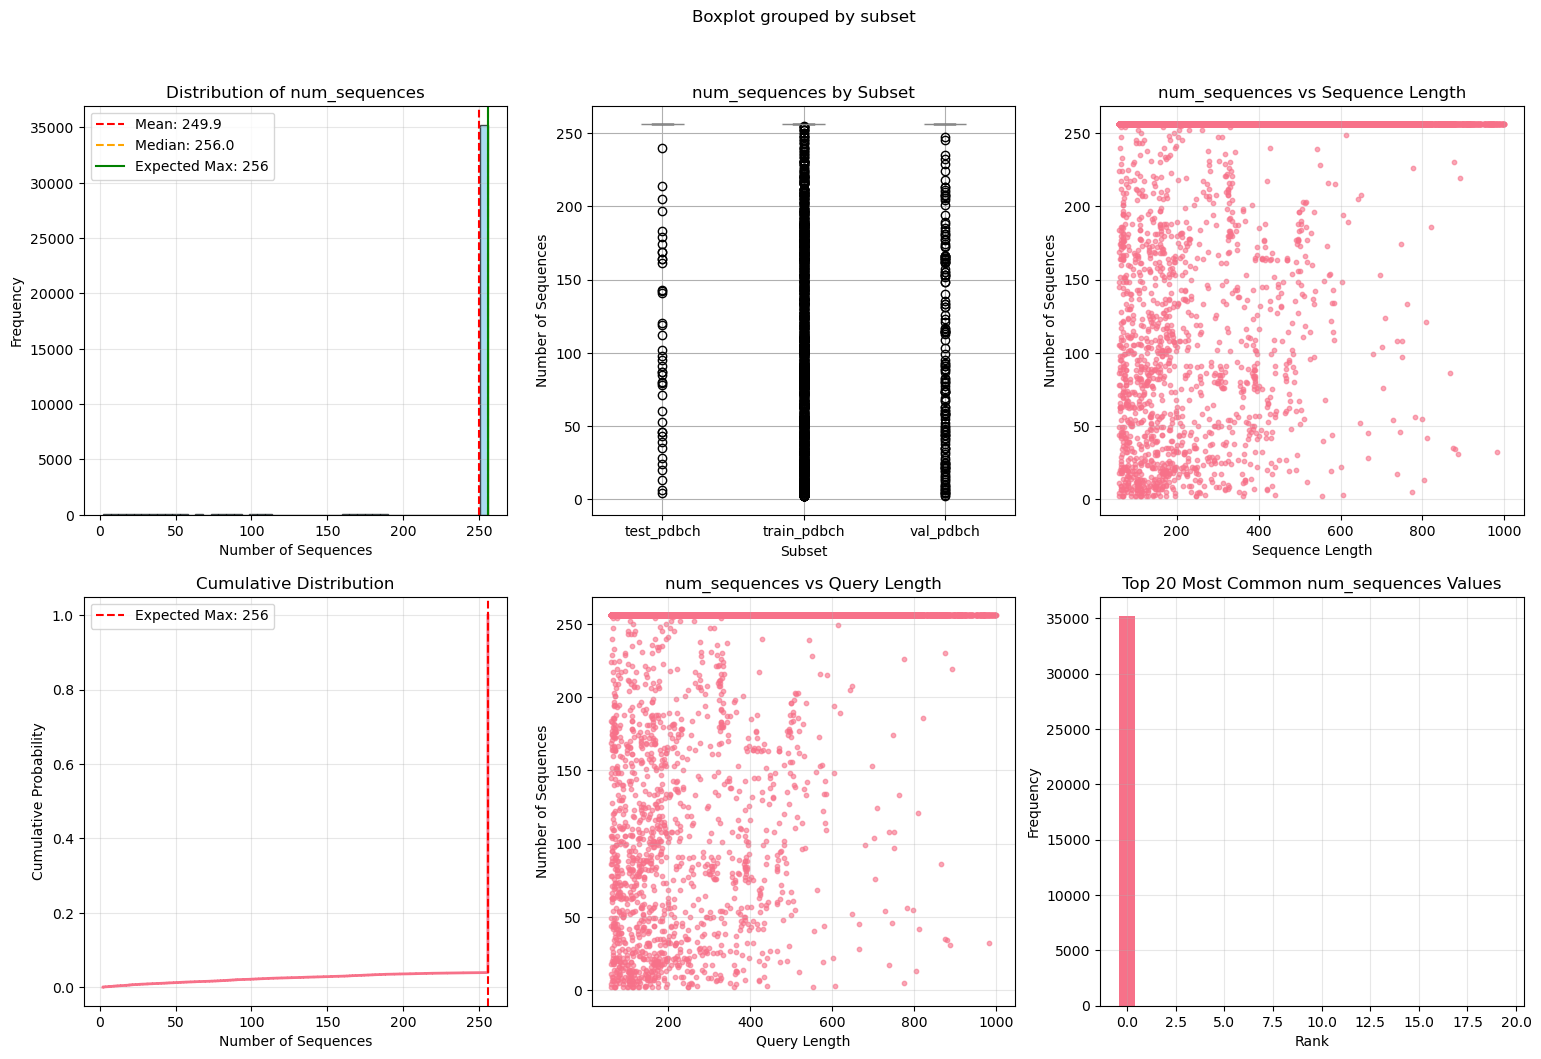

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

def load_and_explore_data(file_path):
    """Load the TSV file and do basic exploration"""
    print("Loading data...")
    df = pd.read_csv(file_path, sep='\t')
    
    print(f"Data loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    
    return df

def comprehensive_num_sequences_analysis(df):
    """Comprehensive analysis of num_sequences column"""
    
    print("\n" + "="*80)
    print("COMPREHENSIVE NUM_SEQUENCES ANALYSIS")
    print("="*80)
    
    # Basic statistics
    print(f"\n1. BASIC STATISTICS")
    print("-" * 40)
    num_seq = df['num_sequences']
    print(f"Total proteins analyzed: {len(df)}")
    print(f"Mean num_sequences: {num_seq.mean():.2f}")
    print(f"Median num_sequences: {num_seq.median():.2f}")
    print(f"Standard deviation: {num_seq.std():.2f}")
    print(f"Minimum: {num_seq.min()}")
    print(f"Maximum: {num_seq.max()}")
    print(f"Range: {num_seq.max() - num_seq.min()}")
    
    # Percentiles
    print(f"\nPercentiles:")
    percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
    for p in percentiles:
        print(f"  {p}th percentile: {np.percentile(num_seq, p):.0f}")
    
    # Distribution analysis
    print(f"\n2. DISTRIBUTION ANALYSIS")
    print("-" * 40)
    
    # Count unique values
    value_counts = num_seq.value_counts().sort_index()
    print(f"Number of unique values: {len(value_counts)}")
    print(f"Most common values:")
    for val, count in value_counts.head(10).items():
        print(f"  {val} sequences: {count} proteins ({count/len(df)*100:.1f}%)")
    
    # Special cases
    max_expected = 256
    at_max = (num_seq == max_expected).sum()
    above_max = (num_seq > max_expected).sum()
    below_10 = (num_seq < 10).sum()
    below_50 = (num_seq < 50).sum()
    
    print(f"\nSpecial cases:")
    print(f"  Proteins with exactly {max_expected} sequences: {at_max} ({at_max/len(df)*100:.1f}%)")
    print(f"  Proteins with > {max_expected} sequences: {above_max} ({above_max/len(df)*100:.1f}%)")
    print(f"  Proteins with < 10 sequences: {below_10} ({below_10/len(df)*100:.1f}%)")
    print(f"  Proteins with < 50 sequences: {below_50} ({below_50/len(df)*100:.1f}%)")
    
    # Subset analysis
    print(f"\n3. SUBSET ANALYSIS")
    print("-" * 40)
    subset_stats = df.groupby('subset')['num_sequences'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
    print(subset_stats.round(2))
    
    # Detailed subset comparison
    print(f"\nSubset comparison:")
    for subset in df['subset'].unique():
        subset_data = df[df['subset'] == subset]['num_sequences']
        at_max_subset = (subset_data == max_expected).sum()
        print(f"  {subset}:")
        print(f"    Mean: {subset_data.mean():.2f}")
        print(f"    At max ({max_expected}): {at_max_subset} ({at_max_subset/len(subset_data)*100:.1f}%)")
        print(f"    Range: {subset_data.min()} - {subset_data.max()}")
    
    # Correlation analysis
    print(f"\n4. CORRELATION ANALYSIS")
    print("-" * 40)
    correlations = df[['num_sequences', 'sequence_length', 'query_length', 'subtracted_length']].corr()['num_sequences']
    print("Correlations with num_sequences:")
    for col, corr in correlations.items():
        if col != 'num_sequences':
            print(f"  {col}: {corr:.3f}")
    
    # Identify outliers
    print(f"\n5. OUTLIER ANALYSIS")
    print("-" * 40)
    
    # Using IQR method
    Q1 = num_seq.quantile(0.25)
    Q3 = num_seq.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_low = df[num_seq < lower_bound]
    outliers_high = df[num_seq > upper_bound]
    
    print(f"IQR-based outliers:")
    print(f"  Lower bound: {lower_bound:.2f}")
    print(f"  Upper bound: {upper_bound:.2f}")
    print(f"  Low outliers: {len(outliers_low)} proteins")
    print(f"  High outliers: {len(outliers_high)} proteins")
    
    if len(outliers_low) > 0:
        print(f"\nProteins with unusually few sequences (< {lower_bound:.0f}):")
        for _, row in outliers_low.head(10).iterrows():
            print(f"  {row['id']} ({row['subset']}): {row['num_sequences']} sequences")
    
    if len(outliers_high) > 0:
        print(f"\nProteins with unusually many sequences (> {upper_bound:.0f}):")
        for _, row in outliers_high.head(10).iterrows():
            print(f"  {row['id']} ({row['subset']}): {row['num_sequences']} sequences")
    
    # Range analysis
    print(f"\n6. RANGE ANALYSIS")
    print("-" * 40)
    
    ranges = [
        (1, 10, "Very Low (1-10)"),
        (11, 50, "Low (11-50)"),
        (51, 100, "Medium-Low (51-100)"),
        (101, 150, "Medium (101-150)"),
        (151, 200, "Medium-High (151-200)"),
        (201, 256, "High (201-256)"),
        (257, float('inf'), "Above Expected (>256)")
    ]
    
    for min_val, max_val, label in ranges:
        if max_val == float('inf'):
            count = (num_seq >= min_val).sum()
        else:
            count = ((num_seq >= min_val) & (num_seq <= max_val)).sum()
        print(f"  {label}: {count} proteins ({count/len(df)*100:.1f}%)")
    
    return df

def create_visualizations(df):
    """Create comprehensive visualizations"""
    
    print(f"\n7. CREATING VISUALIZATIONS")
    print("-" * 40)
    
    # Set up the figure
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Comprehensive num_sequences Analysis', fontsize=16, fontweight='bold')
    
    # 1. Histogram
    axes[0, 0].hist(df['num_sequences'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].axvline(df['num_sequences'].mean(), color='red', linestyle='--', label=f'Mean: {df["num_sequences"].mean():.1f}')
    axes[0, 0].axvline(df['num_sequences'].median(), color='orange', linestyle='--', label=f'Median: {df["num_sequences"].median():.1f}')
    axes[0, 0].axvline(256, color='green', linestyle='-', label='Expected Max: 256')
    axes[0, 0].set_xlabel('Number of Sequences')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Distribution of num_sequences')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Box plot by subset
    df.boxplot(column='num_sequences', by='subset', ax=axes[0, 1])
    axes[0, 1].set_title('num_sequences by Subset')
    axes[0, 1].set_xlabel('Subset')
    axes[0, 1].set_ylabel('Number of Sequences')
    
    # 3. Scatter plot: num_sequences vs sequence_length
    axes[0, 2].scatter(df['sequence_length'], df['num_sequences'], alpha=0.6, s=10)
    axes[0, 2].set_xlabel('Sequence Length')
    axes[0, 2].set_ylabel('Number of Sequences')
    axes[0, 2].set_title('num_sequences vs Sequence Length')
    axes[0, 2].grid(True, alpha=0.3)
    
    # 4. Cumulative distribution
    sorted_values = np.sort(df['num_sequences'])
    cumulative_probs = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
    axes[1, 0].plot(sorted_values, cumulative_probs, linewidth=2)
    axes[1, 0].axvline(256, color='red', linestyle='--', label='Expected Max: 256')
    axes[1, 0].set_xlabel('Number of Sequences')
    axes[1, 0].set_ylabel('Cumulative Probability')
    axes[1, 0].set_title('Cumulative Distribution')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # 5. Scatter plot: num_sequences vs query_length
    axes[1, 1].scatter(df['query_length'], df['num_sequences'], alpha=0.6, s=10)
    axes[1, 1].set_xlabel('Query Length')
    axes[1, 1].set_ylabel('Number of Sequences')
    axes[1, 1].set_title('num_sequences vs Query Length')
    axes[1, 1].grid(True, alpha=0.3)
    
    # 6. Top 20 most common values
    top_values = df['num_sequences'].value_counts().head(20)
    axes[1, 2].bar(range(len(top_values)), top_values.values)
    axes[1, 2].set_xlabel('Rank')
    axes[1, 2].set_ylabel('Frequency')
    axes[1, 2].set_title('Top 20 Most Common num_sequences Values')
    axes[1, 2].grid(True, alpha=0.3)
    
    # Add text annotations for the top values
    for i, (val, count) in enumerate(top_values.head(5).items()):
        axes[1, 2].text(i, count + max(top_values.values()) * 0.01, f'{val}', 
                       ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Additional heatmap for correlation
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[['num_sequences', 'sequence_length', 'query_length', 'subtracted_length']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.3f', cbar_kws={'label': 'Correlation Coefficient'})
    plt.title('Correlation Matrix: num_sequences and Other Variables')
    plt.tight_layout()
    plt.show()

def detailed_subset_analysis(df):
    """Detailed analysis by subset"""
    
    print(f"\n8. DETAILED SUBSET ANALYSIS")
    print("-" * 40)
    
    for subset in sorted(df['subset'].unique()):
        subset_df = df[df['subset'] == subset]
        print(f"\n{subset.upper()} SUBSET:")
        print(f"  Total proteins: {len(subset_df)}")
        print(f"  num_sequences statistics:")
        print(f"    Mean: {subset_df['num_sequences'].mean():.2f}")
        print(f"    Median: {subset_df['num_sequences'].median():.2f}")
        print(f"    Std: {subset_df['num_sequences'].std():.2f}")
        print(f"    Min: {subset_df['num_sequences'].min()}")
        print(f"    Max: {subset_df['num_sequences'].max()}")
        
        # Special counts for this subset
        at_256 = (subset_df['num_sequences'] == 256).sum()
        above_256 = (subset_df['num_sequences'] > 256).sum()
        below_50 = (subset_df['num_sequences'] < 50).sum()
        
        print(f"    At 256: {at_256} ({at_256/len(subset_df)*100:.1f}%)")
        print(f"    Above 256: {above_256} ({above_256/len(subset_df)*100:.1f}%)")
        print(f"    Below 50: {below_50} ({below_50/len(subset_df)*100:.1f}%)")

# Main execution
if __name__ == "__main__":
    # File path
    file_path = r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\notebooks\sequence_length_analysis.tsv"
    
    # Load data
    df = load_and_explore_data(file_path)
    
    # Run comprehensive analysis
    df = comprehensive_num_sequences_analysis(df)
    
    # Create visualizations
    create_visualizations(df)
    
    # Detailed subset analysis
    detailed_subset_analysis(df)
    
    # Final summary
    print(f"\n" + "="*80)
    print("FINAL SUMMARY")
    print("="*80)
    print(f"• Analyzed {len(df)} proteins across {df['subset'].nunique()} subsets")
    print(f"• num_sequences ranges from {df['num_sequences'].min()} to {df['num_sequences'].max()}")
    print(f"• {(df['num_sequences'] == 256).sum()} proteins ({(df['num_sequences'] == 256).sum()/len(df)*100:.1f}%) have the expected maximum of 256 sequences")
    print(f"• Average number of sequences per protein: {df['num_sequences'].mean():.1f}")
    print(f"• Most proteins have between {df['num_sequences'].quantile(0.25):.0f} and {df['num_sequences'].quantile(0.75):.0f} sequences")
    
    if (df['num_sequences'] > 256).any():
        print(f"• {(df['num_sequences'] > 256).sum()} proteins exceed the expected maximum of 256 sequences")
    
    print("\nAnalysis complete!")

<h1>Data Concentration</h1>

In [ ]:
#TODO: 7 missing chains in PDBCH

In [1]:
import os
import glob
from pathlib import Path
from collections import defaultdict, Counter

# Define paths - adjust these to match your exact file structure
base_path = r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing"
data_path = os.path.join(base_path, "data", "PDBCH")
notebooks_path = os.path.join(base_path, "notebooks")

# Text files containing protein IDs
text_files = {
    'train': os.path.join(notebooks_path, "nrPDB-GO_2019.06.18_train.txt"),  # Adjust filename
    'test': os.path.join(notebooks_path, "nrPDB-GO_2019.06.18_test.txt"),   # Adjust filename  
    'val': os.path.join(notebooks_path, "nrPDB-GO_2019.06.18_valid.txt")
}

# Folder paths containing protein subfolders
folder_paths = {
    'train': os.path.join(data_path, "train_pdbch"),
    'test': os.path.join(data_path, "test_pdbch"),
    'val': os.path.join(data_path, "val_pdbch")
}

def strip_tildes(protein_id):
    """Remove all tildes from protein ID"""
    return protein_id.replace('~', '')

def read_protein_ids_from_file(filepath):
    """Read protein IDs from text file, one per line"""
    protein_ids = set()
    try:
        with open(filepath, 'r') as f:
            for line in f:
                protein_id = line.strip()
                if protein_id:  # Skip empty lines
                    protein_ids.add(strip_tildes(protein_id))
        print(f"✓ Loaded {len(protein_ids)} protein IDs from {os.path.basename(filepath)}")
    except FileNotFoundError:
        print(f"✗ File not found: {filepath}")
    except Exception as e:
        print(f"✗ Error reading {filepath}: {e}")
    
    return protein_ids

def get_protein_ids_from_folders(folder_path):
    """Get protein IDs from subfolder names, stripping tildes"""
    protein_ids = set()
    if not os.path.exists(folder_path):
        print(f"✗ Folder not found: {folder_path}")
        return protein_ids
    
    try:
        subfolders = [d for d in os.listdir(folder_path) 
                     if os.path.isdir(os.path.join(folder_path, d))]
        
        for subfolder in subfolders:
            clean_id = strip_tildes(subfolder)
            protein_ids.add(clean_id)
            
        print(f"✓ Found {len(protein_ids)} protein folders in {os.path.basename(folder_path)}")
    except Exception as e:
        print(f"✗ Error reading folders from {folder_path}: {e}")
    
    return protein_ids

print("="*80)
print("PROTEIN DATASET ANALYSIS")
print("="*80)

# Load protein IDs from text files
print("\n1. Loading protein IDs from text files...")
text_protein_ids = {}
for set_name, filepath in text_files.items():
    text_protein_ids[set_name] = read_protein_ids_from_file(filepath)

# Load protein IDs from folders
print("\n2. Loading protein IDs from folders...")
folder_protein_ids = {}
for set_name, folder_path in folder_paths.items():
    folder_protein_ids[set_name] = get_protein_ids_from_folders(folder_path)

print("\n" + "="*80)
print("RUN 1: CHECKING OVERLAP BETWEEN CORRESPONDING SETS")
print("="*80)

# Run 1: Check overlap between corresponding sets
for set_name in ['train', 'test', 'val']:
    if set_name in text_protein_ids and set_name in folder_protein_ids:
        text_set = text_protein_ids[set_name]
        folder_set = folder_protein_ids[set_name]
        
        overlap = text_set.intersection(folder_set)
        text_only = text_set - folder_set
        folder_only = folder_set - text_set
        
        print(f"\n📊 {set_name.upper()} SET ANALYSIS:")
        print(f"   Text file proteins: {len(text_set):,}")
        print(f"   Folder proteins: {len(folder_set):,}")
        print(f"   ✓ Overlap: {len(overlap):,} proteins ({len(overlap)/max(len(text_set), 1)*100:.1f}% of text)")
        print(f"   📝 Only in text: {len(text_only):,} proteins")
        print(f"   📁 Only in folders: {len(folder_only):,} proteins")
        
        if len(text_only) > 0:
            print(f"   🔍 Sample proteins only in text: {list(text_only)[:5]}")
        if len(folder_only) > 0:
            print(f"   🔍 Sample proteins only in folders: {list(folder_only)[:5]}")

print("\n" + "="*80)
print("RUN 2: PROTEINS NOT IN ANY DATASET")
print("="*80)

# Run 2: Find proteins that don't exist in any dataset
all_text_proteins = set()
all_folder_proteins = set()

for proteins in text_protein_ids.values():
    all_text_proteins.update(proteins)

for proteins in folder_protein_ids.values():
    all_folder_proteins.update(proteins)

# Proteins that exist in folders but not in any text file
folder_not_in_text = all_folder_proteins - all_text_proteins

# Proteins that exist in text files but not in any folder
text_not_in_folders = all_text_proteins - all_folder_proteins

print(f"\n📈 SUMMARY STATISTICS:")
print(f"   Total unique proteins in text files: {len(all_text_proteins):,}")
print(f"   Total unique proteins in folders: {len(all_folder_proteins):,}")
print(f"   ❌ Proteins in folders but NOT in any text file: {len(folder_not_in_text):,}")
print(f"   ❌ Proteins in text files but NOT in any folder: {len(text_not_in_folders):,}")

# Detailed analysis of missing proteins
if len(folder_not_in_text) > 0:
    print(f"\n🔍 DETAILED: Proteins in folders but NOT in text files ({len(folder_not_in_text)} total):")
    
    # Find which folder each missing protein belongs to
    missing_protein_locations = defaultdict(list)
    for set_name, proteins in folder_protein_ids.items():
        for protein in proteins:
            if protein in folder_not_in_text:
                missing_protein_locations[protein].append(set_name)
    
    # Show detailed breakdown
    for i, (protein, locations) in enumerate(sorted(missing_protein_locations.items())):
        if i < 20:  # Show first 20 for readability
            print(f"   • {protein} → Found in folder(s): {', '.join(locations)}")
        elif i == 20:
            print(f"   ... and {len(missing_protein_locations) - 20} more proteins")
            break

if len(text_not_in_folders) > 0:
    print(f"\n🔍 DETAILED: Proteins in text files but NOT in folders ({len(text_not_in_folders)} total):")
    
    # Find which text file each missing protein belongs to
    missing_text_locations = defaultdict(list)
    for set_name, proteins in text_protein_ids.items():
        for protein in proteins:
            if protein in text_not_in_folders:
                missing_text_locations[protein].append(set_name)
    
    # Show detailed breakdown
    for i, (protein, locations) in enumerate(sorted(missing_text_locations.items())):
        if i < 20:  # Show first 20 for readability
            print(f"   • {protein} → Found in text file(s): {', '.join(locations)}")
        elif i == 20:
            print(f"   ... and {len(missing_text_locations) - 20} more proteins")
            break

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)

# Optional: Save results to files for further analysis
save_results = input("\nSave detailed results to files? (y/n): ").lower().strip()
if save_results in ['y', 'yes']:
    output_dir = os.path.join(base_path, "analysis_results")
    os.makedirs(output_dir, exist_ok=True)
    
    # Save proteins in folders but not in text
    if folder_not_in_text:
        with open(os.path.join(output_dir, "proteins_in_folders_not_in_text.txt"), 'w') as f:
            for protein in sorted(folder_not_in_text):
                locations = [set_name for set_name, proteins in folder_protein_ids.items() 
                           if protein in proteins]
                f.write(f"{protein}\t{','.join(locations)}\n")
        print(f"✓ Saved proteins_in_folders_not_in_text.txt")
    
    # Save proteins in text but not in folders
    if text_not_in_folders:
        with open(os.path.join(output_dir, "proteins_in_text_not_in_folders.txt"), 'w') as f:
            for protein in sorted(text_not_in_folders):
                locations = [set_name for set_name, proteins in text_protein_ids.items() 
                           if protein in proteins]
                f.write(f"{protein}\t{','.join(locations)}\n")
        print(f"✓ Saved proteins_in_text_not_in_folders.txt")
    
    print(f"📁 Results saved to: {output_dir}")

PROTEIN DATASET ANALYSIS

1. Loading protein IDs from text files...
✓ Loaded 29902 protein IDs from nrPDB-GO_2019.06.18_train.txt
✓ Loaded 3416 protein IDs from nrPDB-GO_2019.06.18_test.txt
✓ Loaded 3323 protein IDs from nrPDB-GO_2019.06.18_valid.txt

2. Loading protein IDs from folders...
✓ Found 29893 protein folders in train_pdbch
✓ Found 3414 protein folders in test_pdbch
✓ Found 3322 protein folders in val_pdbch

RUN 1: CHECKING OVERLAP BETWEEN CORRESPONDING SETS

📊 TRAIN SET ANALYSIS:
   Text file proteins: 29,902
   Folder proteins: 29,893
   ✓ Overlap: 29,893 proteins (100.0% of text)
   📝 Only in text: 9 proteins
   📁 Only in folders: 0 proteins
   🔍 Sample proteins only in text: ['6GML-U', '6GMH-U', '6GMH-W', '6GML-V', '6GML-X']

📊 TEST SET ANALYSIS:
   Text file proteins: 3,416
   Folder proteins: 3,414
   ✓ Overlap: 3,414 proteins (99.9% of text)
   📝 Only in text: 2 proteins
   📁 Only in folders: 0 proteins
   🔍 Sample proteins only in text: ['5JM5-A', '6GML-Y']

📊 VAL SET

In [4]:
import os
import threading
from concurrent.futures import ThreadPoolExecutor, as_completed
from pathlib import Path
import pandas as pd
from tqdm import tqdm
from collections import defaultdict
import time

class SequenceValidator:
    def __init__(self, base_path):
        self.base_path = Path(base_path)
        self.results = []
        self.lock = threading.Lock()
        self.stats = defaultdict(int)
        
    def extract_query_sequence_from_a3m(self, a3m_path):
        """Extract the query sequence from .a3m file (first sequence after >query)"""
        try:
            with open(a3m_path, 'r') as f:
                lines = f.readlines()
            
            # Find the >query line
            query_found = False
            sequence_lines = []
            
            for line in lines:
                line = line.strip()
                if line.startswith('>query'):
                    query_found = True
                    continue
                elif line.startswith('>') and query_found:
                    # Found next sequence header, stop collecting
                    break
                elif query_found and line:
                    # This is part of the query sequence
                    sequence_lines.append(line)
            
            if not query_found:
                return None, "No >query header found"
            
            # Join all sequence lines and remove any gaps/dashes
            query_sequence = ''.join(sequence_lines).replace('-', '')
            return query_sequence, None
            
        except Exception as e:
            return None, f"Error reading a3m file: {str(e)}"
    
    def read_sequence_txt(self, seq_path):
        """Read sequence from sequence.txt file"""
        try:
            with open(seq_path, 'r') as f:
                # Read all lines and join them, removing whitespace
                sequence = ''.join(line.strip() for line in f.readlines())
            return sequence, None
        except Exception as e:
            return None, f"Error reading sequence.txt: {str(e)}"
    
    def process_protein(self, pid_path):
        """Process a single protein folder"""
        pid = pid_path.name
        
        # Check for required files
        seq_file = pid_path / "sequence.txt"
        a3m_file = pid_path / "final_filtered_256_stripped.a3m"
        
        missing_files = []
        if not seq_file.exists():
            missing_files.append("sequence.txt")
        if not a3m_file.exists():
            missing_files.append("final_filtered_256_stripped.a3m")
        
        # Handle missing files
        if missing_files:
            missing_str = ", ".join(missing_files)
            with self.lock:
                print(f"SKIPPING {pid}: Missing files - {missing_str}")
                self.results.append({
                    'pid': pid,
                    'status': 'no_file',
                    'length_difference': 'N/A',
                    'files_missing': missing_str
                })
                self.stats['missing_files'] += 1
            return
        
        # Read sequences
        seq_txt, seq_error = self.read_sequence_txt(seq_file)
        a3m_query, a3m_error = self.extract_query_sequence_from_a3m(a3m_file)
        
        # Handle reading errors
        if seq_error or a3m_error:
            error_msg = f"seq_error: {seq_error}, a3m_error: {a3m_error}"
            with self.lock:
                print(f"SKIPPING {pid}: File reading errors - {error_msg}")
                self.results.append({
                    'pid': pid,
                    'status': 'no_file',
                    'length_difference': 'N/A',
                    'files_missing': error_msg
                })
                self.stats['read_errors'] += 1
            return
        
        # Compare sequences
        if seq_txt == a3m_query:
            with self.lock:
                self.stats['exact_matches'] += 1
        else:
            length_diff = len(seq_txt) - len(a3m_query)
            with self.lock:
                print(f"MISMATCH {pid}: sequence.txt length={len(seq_txt)}, a3m query length={len(a3m_query)}, diff={length_diff}")
                self.results.append({
                    'pid': pid,
                    'status': 'no_match',
                    'length_difference': length_diff,
                    'files_missing': 'N/A',
                    'sequence_txt_content': seq_txt  # Store for FASTA output
                })
                self.stats['mismatches'] += 1
    
    def collect_all_protein_folders(self):
        """Collect all protein folders from test, train, val directories"""
        protein_folders = []
        
        for split in ['test_pdbch', 'train_pdbch', 'val_pdbch']:
            split_path = self.base_path / split
            if split_path.exists():
                for pid_folder in split_path.iterdir():
                    if pid_folder.is_dir():
                        protein_folders.append(pid_folder)
        
        return protein_folders
    
    def run_validation(self, max_workers=8):
        """Run the validation process with multithreading"""
        print(f"Starting sequence validation at {self.base_path}")
        print(f"Using {max_workers} threads")
        
        # Collect all protein folders
        protein_folders = self.collect_all_protein_folders()
        total_proteins = len(protein_folders)
        
        print(f"Found {total_proteins} protein folders to process")
        
        if total_proteins == 0:
            print("No protein folders found! Check your base path.")
            return
        
        # Process with multithreading and progress bar
        start_time = time.time()
        
        with ThreadPoolExecutor(max_workers=max_workers) as executor:
            # Submit all tasks
            future_to_pid = {
                executor.submit(self.process_protein, pid_path): pid_path.name 
                for pid_path in protein_folders
            }
            
            # Process with progress bar
            for future in tqdm(as_completed(future_to_pid), 
                             total=total_proteins, 
                             desc="Processing proteins"):
                try:
                    future.result()  # Get result to catch any exceptions
                except Exception as e:
                    pid = future_to_pid[future]
                    print(f"Error processing {pid}: {str(e)}")
                    with self.lock:
                        self.stats['processing_errors'] += 1
        
        end_time = time.time()
        processing_time = end_time - start_time
        
        # Generate output files
        self.generate_outputs()
        
        # Print summary statistics
        self.print_summary_stats(total_proteins, processing_time)
    
        # --- inside generate_outputs -----------------------------------------------
    def generate_outputs(self):
        print("\nGenerating output files...")

        # ----- SUMMARY -----
        df_results = pd.DataFrame(self.results)           # keep *all* rows
        df_results = df_results.drop(
            columns=['sequence_txt_content'], errors='ignore'
        )
        df_results.to_csv('summary.tsv', sep='\t', index=False)
        print(f"Created summary.tsv with {len(df_results)} entries")

        # ----- FASTA for mismatches -----
        mismatch_seqs = [r for r in self.results if r.get('status') == 'no_match']
        if mismatch_seqs:
            with open('msa_todo.fasta', 'w') as f:
                for r in mismatch_seqs:
                    f.write(f">{r['pid']}\n{r['sequence_txt_content']}\n")
            print(f"Created msa_todo.fasta with {len(mismatch_seqs)} sequences")
        else:
            print("No mismatches found – msa_todo.fasta not created")

    
    def print_summary_stats(self, total_proteins, processing_time):
        """Print comprehensive summary statistics"""
        print("\n" + "="*60)
        print("SEQUENCE VALIDATION SUMMARY")
        print("="*60)
        print(f"Total proteins processed: {total_proteins}")
        print(f"Processing time: {processing_time:.2f} seconds")
        print(f"Average time per protein: {processing_time/total_proteins:.4f} seconds")
        print()
        print("RESULTS BREAKDOWN:")
        print(f"  ✓ Exact matches: {self.stats['exact_matches']}")
        print(f"  ✗ Sequence mismatches: {self.stats['mismatches']}")
        print(f"  📁 Missing files: {self.stats['missing_files']}")
        print(f"  ⚠️  Read errors: {self.stats['read_errors']}")
        print(f"  💥 Processing errors: {self.stats['processing_errors']}")
        print()
        
        # Calculate percentages
        if total_proteins > 0:
            match_pct = (self.stats['exact_matches'] / total_proteins) * 100
            mismatch_pct = (self.stats['mismatches'] / total_proteins) * 100
            missing_pct = (self.stats['missing_files'] / total_proteins) * 100
            
            print("PERCENTAGES:")
            print(f"  Exact matches: {match_pct:.1f}%")
            print(f"  Mismatches: {mismatch_pct:.1f}%")
            print(f"  Missing files: {missing_pct:.1f}%")
        
        print()
        print("OUTPUT FILES CREATED:")
        if os.path.exists('summary.tsv'):
            print(f"  📋 summary.tsv ({os.path.getsize('summary.tsv')} bytes)")
        if os.path.exists('msa_todo.fasta'):
            print(f"  🧬 msa_todo.fasta ({os.path.getsize('msa_todo.fasta')} bytes)")
        print("="*60)


def main():
    # Set your base path here
    base_path = r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\PDBCH"
    
    # Initialize validator
    validator = SequenceValidator(base_path)
    
    # Run validation with multithreading (adjust max_workers as needed)
    validator.run_validation(max_workers=8)


if __name__ == "__main__":
    main()

Starting sequence validation at C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\PDBCH
Using 8 threads
Found 36629 protein folders to process


Processing proteins:   2%|▏         | 726/36629 [00:00<00:29, 1222.20it/s]

MISMATCH 1WA5-B: sequence.txt length=530, a3m query length=530, diff=0


Processing proteins:   6%|▌         | 2226/36629 [00:01<00:21, 1609.61it/s]

MISMATCH 4OY4-A: sequence.txt length=415, a3m query length=413, diff=2
MISMATCH 4V8T-O: sequence.txt length=199, a3m query length=219, diff=-20


Processing proteins:   8%|▊         | 2863/36629 [00:01<00:21, 1559.16it/s]

MISMATCH 5MHH-A: sequence.txt length=188, a3m query length=188, diff=0


Processing proteins:   9%|▉         | 3336/36629 [00:02<00:22, 1464.09it/s]

MISMATCH 6ENU-w~: sequence.txt length=188, a3m query length=188, diff=0
MISMATCH 6H45-A: sequence.txt length=392, a3m query length=393, diff=-1
MISMATCH 6HCS-A: sequence.txt length=167, a3m query length=167, diff=0


Processing proteins:  11%|█         | 3866/36629 [00:02<00:19, 1672.74it/s]

MISMATCH 1AQK-L: sequence.txt length=216, a3m query length=216, diff=0
MISMATCH 1AW8-B: sequence.txt length=91, a3m query length=92, diff=-1
MISMATCH 1B3Z-A: sequence.txt length=302, a3m query length=302, diff=0
MISMATCH 1B9C-A: sequence.txt length=238, a3m query length=236, diff=2
MISMATCH 1BC4-A: sequence.txt length=111, a3m query length=111, diff=0
MISMATCH 1BVS-A: sequence.txt length=203, a3m query length=203, diff=0


Processing proteins:  12%|█▏        | 4434/36629 [00:02<00:17, 1805.03it/s]

MISMATCH 1EG1-A: sequence.txt length=371, a3m query length=371, diff=0
MISMATCH 1EIS-A: sequence.txt length=89, a3m query length=90, diff=-1
MISMATCH 1G7K-A: sequence.txt length=236, a3m query length=234, diff=2


Processing proteins:  13%|█▎        | 4814/36629 [00:03<00:17, 1820.62it/s]

MISMATCH 1GPI-A: sequence.txt length=431, a3m query length=431, diff=0
MISMATCH 1GQ8-A: sequence.txt length=319, a3m query length=319, diff=0
MISMATCH 1GV7-A: sequence.txt length=123, a3m query length=123, diff=0
MISMATCH 1H1A-A: sequence.txt length=191, a3m query length=191, diff=0
MISMATCH 1H4G-A: sequence.txt length=207, a3m query length=207, diff=0
MISMATCH 1I1X-A: sequence.txt length=303, a3m query length=303, diff=0
MISMATCH 1I8O-A: sequence.txt length=114, a3m query length=114, diff=0


Processing proteins:  15%|█▍        | 5357/36629 [00:03<00:17, 1742.58it/s]

MISMATCH 1IQB-A: sequence.txt length=89, a3m query length=89, diff=0
MISMATCH 1K7T-A: sequence.txt length=186, a3m query length=186, diff=0


Processing proteins:  16%|█▌        | 5917/36629 [00:03<00:17, 1757.06it/s]

MISMATCH 1MFU-A: sequence.txt length=491, a3m query length=491, diff=0
MISMATCH 1MOU-A: sequence.txt length=221, a3m query length=219, diff=2


Processing proteins:  17%|█▋        | 6262/36629 [00:03<00:18, 1618.18it/s]

MISMATCH 1OA3-A: sequence.txt length=218, a3m query length=218, diff=0
MISMATCH 1OFM-A: sequence.txt length=481, a3m query length=481, diff=0
MISMATCH 1OJJ-A: sequence.txt length=402, a3m query length=402, diff=0
MISMATCH 1OJ1-A: sequence.txt length=105, a3m query length=105, diff=0
MISMATCH 1OLQ-A: sequence.txt length=218, a3m query length=218, diff=0
MISMATCH 1OLR-A: sequence.txt length=224, a3m query length=224, diff=0
MISMATCH 1PSP-A: sequence.txt length=106, a3m query length=106, diff=0


Processing proteins:  19%|█▊        | 6802/36629 [00:04<00:17, 1745.42it/s]

MISMATCH 1Q2E-A: sequence.txt length=426, a3m query length=426, diff=0
MISMATCH 1QI9-A: sequence.txt length=556, a3m query length=556, diff=0
MISMATCH 1RCK-A: sequence.txt length=106, a3m query length=106, diff=0


Processing proteins:  20%|██        | 7385/36629 [00:04<00:15, 1871.85it/s]

MISMATCH 1T6J-A: sequence.txt length=716, a3m query length=714, diff=2
MISMATCH 1THG-A: sequence.txt length=544, a3m query length=544, diff=0
MISMATCH 1UIS-A: sequence.txt length=233, a3m query length=231, diff=2


Processing proteins:  22%|██▏       | 7961/36629 [00:04<00:16, 1725.09it/s]

SKIPPING 1W8X-M: Missing files - final_filtered_256_stripped.a3m
MISMATCH 1WQ8-A: sequence.txt length=110, a3m query length=110, diff=0


Processing proteins:  23%|██▎       | 8532/36629 [00:05<00:15, 1785.21it/s]

MISMATCH 1XPM-A: sequence.txt length=396, a3m query length=397, diff=-1
MISMATCH 1XQM-A: sequence.txt length=232, a3m query length=230, diff=2
MISMATCH 1YNA-A: sequence.txt length=194, a3m query length=194, diff=0
MISMATCH 1YSL-B: sequence.txt length=402, a3m query length=403, diff=-1
MISMATCH 1Z5F-A: sequence.txt length=105, a3m query length=105, diff=0


Processing proteins:  25%|██▍       | 9111/36629 [00:05<00:14, 1866.49it/s]

MISMATCH 2A48-A: sequence.txt length=240, a3m query length=238, diff=2


Processing proteins:  26%|██▌       | 9488/36629 [00:05<00:14, 1869.36it/s]

MISMATCH 2C9J-A: sequence.txt length=225, a3m query length=223, diff=2
MISMATCH 2C9I-A: sequence.txt length=228, a3m query length=226, diff=2
MISMATCH 2DDD-A: sequence.txt length=227, a3m query length=225, diff=2


Processing proteins:  29%|██▊       | 10455/36629 [00:06<00:13, 1891.10it/s]

MISMATCH 2FL1-A: sequence.txt length=228, a3m query length=226, diff=2
MISMATCH 2G6X-A: sequence.txt length=219, a3m query length=217, diff=2
MISMATCH 2GW3-A: sequence.txt length=227, a3m query length=225, diff=2


Processing proteins:  29%|██▉       | 10645/36629 [00:06<00:14, 1815.50it/s]

MISMATCH 2HPW-A: sequence.txt length=235, a3m query length=233, diff=2
MISMATCH 2HQK-A: sequence.txt length=221, a3m query length=219, diff=2
MISMATCH 2IB5-A: sequence.txt length=235, a3m query length=233, diff=2


Processing proteins:  31%|███       | 11234/36629 [00:06<00:14, 1758.30it/s]

MISMATCH 2JAD-A: sequence.txt length=364, a3m query length=362, diff=2


Processing proteins:  33%|███▎      | 12101/36629 [00:07<00:13, 1762.52it/s]

MISMATCH 2NYF-A: sequence.txt length=569, a3m query length=567, diff=2
MISMATCH 2O7D-A: sequence.txt length=523, a3m query length=521, diff=2
MISMATCH 2OHY-A: sequence.txt length=541, a3m query length=539, diff=2
MISMATCH 2OVW-A: sequence.txt length=411, a3m query length=411, diff=0
MISMATCH 2OWC-A: sequence.txt length=503, a3m query length=502, diff=1


Processing proteins:  35%|███▍      | 12682/36629 [00:07<00:12, 1867.34it/s]

MISMATCH 2PXS-A: sequence.txt length=228, a3m query length=227, diff=1


Processing proteins:  36%|███▌      | 13060/36629 [00:07<00:13, 1704.35it/s]

MISMATCH 2RFW-A: sequence.txt length=430, a3m query length=430, diff=0
MISMATCH 2RH7-A: sequence.txt length=241, a3m query length=239, diff=2
MISMATCH 2UV2-A: sequence.txt length=325, a3m query length=326, diff=-1
MISMATCH 2VAD-A: sequence.txt length=225, a3m query length=223, diff=2


Processing proteins:  37%|███▋      | 13425/36629 [00:07<00:13, 1760.73it/s]

MISMATCH 2VQR-A: sequence.txt length=543, a3m query length=544, diff=-1
MISMATCH 2VZX-A: sequence.txt length=231, a3m query length=229, diff=2
MISMATCH 2W15-A: sequence.txt length=202, a3m query length=202, diff=0
MISMATCH 2W8S-A: sequence.txt length=543, a3m query length=544, diff=-1
MISMATCH 2WHU-A: sequence.txt length=242, a3m query length=240, diff=2
MISMATCH 2WIS-A: sequence.txt length=259, a3m query length=257, diff=2
SKIPPING 2WWX-B: Missing files - final_filtered_256_stripped.a3m


Processing proteins:  38%|███▊      | 13778/36629 [00:08<00:13, 1697.11it/s]

MISMATCH 2XSP-A: sequence.txt length=440, a3m query length=440, diff=0
MISMATCH 2YOK-A: sequence.txt length=426, a3m query length=426, diff=0
MISMATCH 2Z49-A: sequence.txt length=432, a3m query length=432, diff=0
MISMATCH 2Z6Y-A: sequence.txt length=227, a3m query length=225, diff=2


Processing proteins:  39%|███▉      | 14307/36629 [00:08<00:13, 1675.45it/s]

MISMATCH 2ZMU-A: sequence.txt length=226, a3m query length=223, diff=3
MISMATCH 2ZO7-A: sequence.txt length=224, a3m query length=222, diff=2
MISMATCH 2ZO6-A: sequence.txt length=254, a3m query length=252, diff=2
MISMATCH 3A9C-A: sequence.txt length=338, a3m query length=339, diff=-1
MISMATCH 3ADF-A: sequence.txt length=228, a3m query length=226, diff=2
MISMATCH 3AI4-A: sequence.txt length=285, a3m query length=283, diff=2
MISMATCH 3AI5-A: sequence.txt length=309, a3m query length=307, diff=2
MISMATCH 3AKO-A: sequence.txt length=175, a3m query length=173, diff=2


Processing proteins:  41%|████      | 14841/36629 [00:08<00:12, 1745.27it/s]

MISMATCH 3BXB-A: sequence.txt length=245, a3m query length=243, diff=2
MISMATCH 3CFF-A: sequence.txt length=169, a3m query length=167, diff=2
MISMATCH 3CGL-A: sequence.txt length=243, a3m query length=241, diff=2


Processing proteins:  42%|████▏     | 15370/36629 [00:09<00:12, 1656.38it/s]

MISMATCH 3ED8-A: sequence.txt length=262, a3m query length=260, diff=2
MISMATCH 3EK4-A: sequence.txt length=451, a3m query length=449, diff=2
MISMATCH 3EMY-A: sequence.txt length=329, a3m query length=329, diff=0
MISMATCH 3EVP-A: sequence.txt length=245, a3m query length=243, diff=2
MISMATCH 3FCR-A: sequence.txt length=458, a3m query length=459, diff=-1


Processing proteins:  47%|████▋     | 17056/36629 [00:09<00:10, 1903.07it/s]

MISMATCH 3KQ0-A: sequence.txt length=192, a3m query length=192, diff=0
MISMATCH 3L2M-A: sequence.txt length=496, a3m query length=496, diff=0
MISMATCH 3LF3-A: sequence.txt length=231, a3m query length=230, diff=1
MISMATCH 3LF4-B: sequence.txt length=165, a3m query length=164, diff=1
MISMATCH 3M24-A: sequence.txt length=234, a3m query length=232, diff=2
SKIPPING 3M7G-A: Missing files - final_filtered_256_stripped.a3m


Processing proteins:  48%|████▊     | 17439/36629 [00:10<00:10, 1875.38it/s]

MISMATCH 3MCG-1: sequence.txt length=216, a3m query length=216, diff=0
MISMATCH 3NBJ-A: sequence.txt length=692, a3m query length=694, diff=-2


Processing proteins:  49%|████▉     | 18007/36629 [00:10<00:10, 1817.36it/s]

MISMATCH 3O2R-B: sequence.txt length=170, a3m query length=171, diff=-1
MISMATCH 3OSR-A: sequence.txt length=655, a3m query length=653, diff=2
MISMATCH 3OSQ-A: sequence.txt length=663, a3m query length=661, diff=2
MISMATCH 3P28-A: sequence.txt length=241, a3m query length=239, diff=2
MISMATCH 3PJB-A: sequence.txt length=231, a3m query length=229, diff=2
MISMATCH 3PL3-A: sequence.txt length=437, a3m query length=437, diff=0


Processing proteins:  51%|█████     | 18717/36629 [00:10<00:10, 1636.89it/s]

MISMATCH 3RWA-A: sequence.txt length=235, a3m query length=233, diff=2


Processing proteins:  52%|█████▏    | 19205/36629 [00:11<00:10, 1595.86it/s]

MISMATCH 3TYG-L: sequence.txt length=211, a3m query length=211, diff=0
MISMATCH 3U0M-A: sequence.txt length=232, a3m query length=230, diff=2
MISMATCH 3U8P-A: sequence.txt length=349, a3m query length=347, diff=2
MISMATCH 3VHT-B: sequence.txt length=273, a3m query length=271, diff=2


Processing proteins:  54%|█████▎    | 19680/36629 [00:11<00:11, 1536.10it/s]

MISMATCH 3WCK-A: sequence.txt length=273, a3m query length=271, diff=2


Processing proteins:  55%|█████▌    | 20304/36629 [00:11<00:10, 1522.32it/s]

MISMATCH 4BDU-A: sequence.txt length=311, a3m query length=309, diff=2
MISMATCH 4BKC-A: sequence.txt length=159, a3m query length=160, diff=-1
MISMATCH 4CJG-A: sequence.txt length=127, a3m query length=127, diff=0
MISMATCH 4CSI-A: sequence.txt length=439, a3m query length=439, diff=0


Processing proteins:  57%|█████▋    | 20798/36629 [00:12<00:09, 1597.37it/s]

MISMATCH 4DKN-A: sequence.txt length=223, a3m query length=221, diff=2
MISMATCH 4DKM-A: sequence.txt length=216, a3m query length=214, diff=2
MISMATCH 4DXM-A: sequence.txt length=231, a3m query length=229, diff=2
MISMATCH 4DXQ-A: sequence.txt length=230, a3m query length=228, diff=2
MISMATCH 4EDO-A: sequence.txt length=243, a3m query length=241, diff=2


Processing proteins:  59%|█████▉    | 21609/36629 [00:12<00:09, 1614.60it/s]

MISMATCH 4GWA-A: sequence.txt length=431, a3m query length=431, diff=0
MISMATCH 4H3M-A: sequence.txt length=234, a3m query length=232, diff=2
MISMATCH 4HE4-A: sequence.txt length=246, a3m query length=244, diff=2
MISMATCH 4HVF-A: sequence.txt length=228, a3m query length=226, diff=2
MISMATCH 4I2Y-A: sequence.txt length=421, a3m query length=419, diff=2
MISMATCH 4IIS-A: sequence.txt length=316, a3m query length=316, diff=0


Processing proteins:  60%|█████▉    | 21935/36629 [00:12<00:09, 1615.18it/s]

MISMATCH 4JC2-A: sequence.txt length=224, a3m query length=222, diff=2
MISMATCH 4JF9-A: sequence.txt length=228, a3m query length=226, diff=2
MISMATCH 4JP7-A: sequence.txt length=122, a3m query length=122, diff=0
MISMATCH 4JRB-A: sequence.txt length=418, a3m query length=416, diff=2
MISMATCH 4KF4-A: sequence.txt length=225, a3m query length=223, diff=2
MISMATCH 4KF5-A: sequence.txt length=196, a3m query length=194, diff=2


Processing proteins:  62%|██████▏   | 22568/36629 [00:13<00:09, 1525.49it/s]

MISMATCH 4LW5-A: sequence.txt length=241, a3m query length=239, diff=2


Processing proteins:  62%|██████▏   | 22879/36629 [00:13<00:09, 1508.36it/s]

MISMATCH 4NDJ-A: sequence.txt length=299, a3m query length=297, diff=2
MISMATCH 4NTW-B: sequence.txt length=60, a3m query length=60, diff=0
MISMATCH 4ORN-A: sequence.txt length=241, a3m query length=239, diff=2


Processing proteins:  64%|██████▎   | 23329/36629 [00:13<00:08, 1481.57it/s]

MISMATCH 4PDH-A: sequence.txt length=301, a3m query length=301, diff=0
MISMATCH 4PDD-A: sequence.txt length=303, a3m query length=303, diff=0
MISMATCH 4PFE-A: sequence.txt length=345, a3m query length=343, diff=2
MISMATCH 4PPK-A: sequence.txt length=247, a3m query length=245, diff=2
MISMATCH 4QI6-A: sequence.txt length=807, a3m query length=807, diff=0


Processing proteins:  66%|██████▌   | 24084/36629 [00:14<00:08, 1500.26it/s]

MISMATCH 4UPI-A: sequence.txt length=576, a3m query length=577, diff=-1
MISMATCH 4UPV-Q: sequence.txt length=563, a3m query length=564, diff=-1
MISMATCH 4UUP-A: sequence.txt length=341, a3m query length=342, diff=-1
MISMATCH 4V1Z-A: sequence.txt length=440, a3m query length=440, diff=0
MISMATCH 4V3F-A: sequence.txt length=497, a3m query length=498, diff=-1


Processing proteins:  67%|██████▋   | 24620/36629 [00:14<00:07, 1644.53it/s]

MISMATCH 4W6M-A: sequence.txt length=236, a3m query length=234, diff=2
MISMATCH 4WQD-A: sequence.txt length=252, a3m query length=253, diff=-1
MISMATCH 4XBI-A: sequence.txt length=383, a3m query length=381, diff=2
MISMATCH 4XEB-A: sequence.txt length=436, a3m query length=436, diff=0
MISMATCH 4XGY-A: sequence.txt length=305, a3m query length=303, diff=2


Processing proteins:  68%|██████▊   | 24942/36629 [00:14<00:07, 1540.28it/s]

MISMATCH 4XOV-A: sequence.txt length=272, a3m query length=270, diff=2
MISMATCH 4Z4M-A: sequence.txt length=262, a3m query length=260, diff=2


Processing proteins:  70%|██████▉   | 25582/36629 [00:15<00:06, 1580.98it/s]

MISMATCH 4ZZP-A: sequence.txt length=439, a3m query length=439, diff=0


Processing proteins:  71%|███████   | 25899/36629 [00:15<00:06, 1573.92it/s]

MISMATCH 5BQL-A: sequence.txt length=244, a3m query length=242, diff=2
MISMATCH 5BY8-A: sequence.txt length=231, a3m query length=241, diff=-10


Processing proteins:  72%|███████▏  | 26372/36629 [00:15<00:06, 1530.84it/s]

MISMATCH 5E6V-A: sequence.txt length=224, a3m query length=224, diff=0
MISMATCH 5EBJ-A: sequence.txt length=231, a3m query length=229, diff=2
MISMATCH 5EXC-I: sequence.txt length=172, a3m query length=170, diff=2
MISMATCH 5EXC-A: sequence.txt length=62, a3m query length=62, diff=0
MISMATCH 5F9G-A: sequence.txt length=259, a3m query length=257, diff=2
MISMATCH 5FAX-A: sequence.txt length=433, a3m query length=433, diff=0
MISMATCH 5FHV-A: sequence.txt length=269, a3m query length=268, diff=1
MISMATCH 5FGU-A: sequence.txt length=567, a3m query length=565, diff=2


Processing proteins:  73%|███████▎  | 26682/36629 [00:16<00:06, 1532.41it/s]

SKIPPING 5GAO-E: Missing files - final_filtered_256_stripped.a3m


Processing proteins:  75%|███████▍  | 27357/36629 [00:16<00:07, 1164.48it/s]

MISMATCH 5IWL-C: sequence.txt length=114, a3m query length=114, diff=0
MISMATCH 5J3N-A: sequence.txt length=398, a3m query length=396, diff=2
MISMATCH 5JFN-A: sequence.txt length=524, a3m query length=525, diff=-1
MISMATCH 5JK4-A: sequence.txt length=373, a3m query length=373, diff=0


Processing proteins:  76%|███████▋  | 27945/36629 [00:17<00:06, 1341.04it/s]

MISMATCH 5LK4-A: sequence.txt length=219, a3m query length=217, diff=2
MISMATCH 5LKY-A: sequence.txt length=300, a3m query length=300, diff=0
MISMATCH 5LTM-B: sequence.txt length=539, a3m query length=537, diff=2
MISMATCH 5LTR-A: sequence.txt length=271, a3m query length=269, diff=2
MISMATCH 5LTQ-A: sequence.txt length=269, a3m query length=267, diff=2
MISMATCH 5MCE-A: sequence.txt length=445, a3m query length=445, diff=0


Processing proteins:  78%|███████▊  | 28388/36629 [00:17<00:05, 1431.95it/s]

MISMATCH 5MSE-A: sequence.txt length=240, a3m query length=238, diff=2
MISMATCH 5MWC-D: sequence.txt length=311, a3m query length=309, diff=2


Processing proteins:  79%|███████▉  | 28989/36629 [00:17<00:05, 1464.72it/s]

SKIPPING 5OXE-A: Missing files - final_filtered_256_stripped.a3m


Processing proteins:  80%|████████  | 29472/36629 [00:18<00:04, 1562.06it/s]

MISMATCH 5UIW-B: sequence.txt length=75, a3m query length=75, diff=0
MISMATCH 5UKG-A: sequence.txt length=419, a3m query length=417, diff=2
MISMATCH 5UR0-A: sequence.txt length=349, a3m query length=350, diff=-1


Processing proteins:  81%|████████▏ | 29797/36629 [00:18<00:04, 1584.26it/s]

MISMATCH 5W11-A: sequence.txt length=440, a3m query length=440, diff=0
MISMATCH 5WC4-A: sequence.txt length=390, a3m query length=391, diff=-1
MISMATCH 5WHS-A: sequence.txt length=768, a3m query length=768, diff=0
MISMATCH 5WWK-A: sequence.txt length=231, a3m query length=229, diff=2


Processing proteins:  83%|████████▎ | 30485/36629 [00:18<00:03, 1637.00it/s]

MISMATCH 5Y00-A: sequence.txt length=273, a3m query length=271, diff=2
MISMATCH 5Y8R-A: sequence.txt length=234, a3m query length=232, diff=2


Processing proteins:  85%|████████▍ | 31000/36629 [00:19<00:03, 1690.17it/s]

MISMATCH 6AA7-A: sequence.txt length=235, a3m query length=233, diff=2
MISMATCH 6ACN-A: sequence.txt length=754, a3m query length=754, diff=0
MISMATCH 6AT7-A: sequence.txt length=704, a3m query length=702, diff=2
MISMATCH 6B7R-B: sequence.txt length=238, a3m query length=236, diff=2
MISMATCH 6B7T-A: sequence.txt length=248, a3m query length=246, diff=2


Processing proteins:  86%|████████▌ | 31504/36629 [00:19<00:03, 1474.79it/s]

MISMATCH 6CEK-A: sequence.txt length=728, a3m query length=728, diff=0


Processing proteins:  87%|████████▋ | 31814/36629 [00:19<00:03, 1453.05it/s]

MISMATCH 6DGV-A: sequence.txt length=568, a3m query length=566, diff=2
MISMATCH 6EFR-A: sequence.txt length=522, a3m query length=520, diff=2


Processing proteins:  88%|████████▊ | 32142/36629 [00:19<00:02, 1505.56it/s]

MISMATCH 6F5G-A: sequence.txt length=703, a3m query length=700, diff=3
MISMATCH 6FD3-A: sequence.txt length=300, a3m query length=300, diff=0
MISMATCH 6FP7-A: sequence.txt length=250, a3m query length=248, diff=2
MISMATCH 6FXO-A: sequence.txt length=246, a3m query length=244, diff=2


Processing proteins:  90%|█████████ | 33027/36629 [00:20<00:02, 1474.51it/s]

MISMATCH 6M9Z-A: sequence.txt length=230, a3m query length=231, diff=-1


Processing proteins:  92%|█████████▏| 33790/36629 [00:20<00:01, 1797.56it/s]

MISMATCH 1COR-A: sequence.txt length=82, a3m query length=82, diff=0
MISMATCH 1DIN-A: sequence.txt length=236, a3m query length=237, diff=-1
MISMATCH 1ESR-A: sequence.txt length=76, a3m query length=76, diff=0
MISMATCH 1GKM-A: sequence.txt length=509, a3m query length=509, diff=0
SKIPPING 1KVE-A: Missing files - final_filtered_256_stripped.a3m
MISMATCH 1LEC-A: sequence.txt length=243, a3m query length=243, diff=0
MISMATCH 1SCH-A: sequence.txt length=294, a3m query length=294, diff=0
MISMATCH 1TMQ-A: sequence.txt length=471, a3m query length=471, diff=0


Processing proteins:  93%|█████████▎| 33979/36629 [00:20<00:01, 1821.72it/s]

MISMATCH 1W27-A: sequence.txt length=716, a3m query length=714, diff=2
MISMATCH 1YZW-A: sequence.txt length=227, a3m query length=225, diff=2
MISMATCH 2A53-B: sequence.txt length=170, a3m query length=168, diff=2
MISMATCH 2CJ1-A: sequence.txt length=299, a3m query length=299, diff=0
MISMATCH 2DD7-A: sequence.txt length=218, a3m query length=216, diff=2
MISMATCH 2GW4-B: sequence.txt length=164, a3m query length=162, diff=2
MISMATCH 2IOV-A: sequence.txt length=257, a3m query length=255, diff=2


Processing proteins:  94%|█████████▍| 34564/36629 [00:21<00:01, 1790.74it/s]

MISMATCH 2V4E-A: sequence.txt length=220, a3m query length=218, diff=2
MISMATCH 3GJU-A: sequence.txt length=460, a3m query length=461, diff=-1


Processing proteins:  96%|█████████▌| 35107/36629 [00:21<00:00, 1776.77it/s]

MISMATCH 3LVD-A: sequence.txt length=238, a3m query length=236, diff=2
MISMATCH 3PHN-A: sequence.txt length=104, a3m query length=105, diff=-1
MISMATCH 3U0K-A: sequence.txt length=442, a3m query length=440, diff=2
SKIPPING 4BTP-A: Missing files - final_filtered_256_stripped.a3m


Processing proteins:  97%|█████████▋| 35468/36629 [00:21<00:00, 1773.00it/s]

MISMATCH 4CXU-A: sequence.txt length=536, a3m query length=536, diff=0
MISMATCH 4KF5-C: sequence.txt length=262, a3m query length=260, diff=2
MISMATCH 4OHS-A: sequence.txt length=239, a3m query length=238, diff=1
MISMATCH 4R6B-A: sequence.txt length=232, a3m query length=230, diff=2
MISMATCH 4U2V-B: sequence.txt length=315, a3m query length=313, diff=2
MISMATCH 4UDF-1B: sequence.txt length=229, a3m query length=289, diff=-60
MISMATCH 4UPH-A: sequence.txt length=547, a3m query length=547, diff=0


Processing proteins:  98%|█████████▊| 36012/36629 [00:22<00:00, 1792.73it/s]

MISMATCH 4Z4K-A: sequence.txt length=292, a3m query length=290, diff=2
MISMATCH 4ZB1-A: sequence.txt length=251, a3m query length=249, diff=2
MISMATCH 4ZZV-A: sequence.txt length=438, a3m query length=438, diff=0
MISMATCH 4ZZQ-A: sequence.txt length=438, a3m query length=438, diff=0
MISMATCH 5A8R-A: sequence.txt length=553, a3m query length=553, diff=0
MISMATCH 5A7M-A: sequence.txt length=766, a3m query length=766, diff=0
MISMATCH 5KTG-A: sequence.txt length=311, a3m query length=309, diff=2


Processing proteins:  99%|█████████▉| 36383/36629 [00:22<00:00, 1820.60it/s]

MISMATCH 5O5D-A: sequence.txt length=430, a3m query length=430, diff=0


Processing proteins: 100%|██████████| 36629/36629 [00:22<00:00, 1634.28it/s]


Generating output files...
Created summary.tsv with 240 entries
Created msa_todo.fasta with 233 sequences

SEQUENCE VALIDATION SUMMARY
Total proteins processed: 36629
Processing time: 23.40 seconds
Average time per protein: 0.0006 seconds

RESULTS BREAKDOWN:
  ✓ Exact matches: 36389
  ✗ Sequence mismatches: 233
  📁 Missing files: 7
  ⚠️  Read errors: 0
  💥 Processing errors: 0

PERCENTAGES:
  Exact matches: 99.3%
  Mismatches: 0.6%
  Missing files: 0.0%

OUTPUT FILES CREATED:
  📋 summary.tsv (5800 bytes)
  🧬 msa_todo.fasta (75956 bytes)


In [1]:
# Cell 1 ─────────────────────────────────────────────────────────────────────
"""
Batch-clean ColabFold MSAs → write *final_filtered_256_stripped.a3m* next to the
matching PDB-CH protein and record a mapping TSV.

NEW IN THIS VERSION
────────────────────
• TSV now has an explicit *protein_dir* column (the PID sub-folder).
• Sanity-check: after stripping insertions we assert that **all sequences are
  exactly the same length** (true alignment).  If not, the file is flagged.
• Added final_sequences and duplicates_removed columns to TSV output.
• Updated deduplication logic to match single processor exactly.
"""

from __future__ import annotations
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor, as_completed
from random import sample, seed
from collections import Counter
import os, string, csv, traceback
from tqdm.auto import tqdm

# ───────────────────  CONFIG  ──────────────────────────────────────────────#
MSA_DIR   = Path(r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\notebooks\msa_final_covnul")
PDBCH_DIR = Path(r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\PDBCH")
SPLITS    = ["train_pdbch", "val_pdbch", "test_pdbch"]
MAX_DEPTH = 256
N_WORKERS = min(os.cpu_count() or 1, 8)
REPORT_TSV = Path("msa_mapping.tsv")
# ───────────────────────────────────────────────────────────────────────────#

# translation table to strip insertions
delete = dict.fromkeys(string.ascii_lowercase, None) | {".": None, "*": None}
STRIP = str.maketrans(delete)
def remove_insertions(seq: str) -> str:
    """Remove lower-case letters, '.' and '*'."""
    return seq.translate(STRIP)

# ---------------------------------------------------------------------------#
def index_pdbch() -> dict[str, tuple[str, Path]]:
    """Return {sequence: (split, protein_dir)} for all splits, with progress."""
    idx = {}
    for split in SPLITS:
        prot_dirs = list((PDBCH_DIR / split).iterdir())
        for prot_dir in tqdm(prot_dirs, desc=f"Indexing {split}", leave=False):
            seq_file = prot_dir / "sequence.txt"
            if not seq_file.exists():
                continue
            seq = remove_insertions(seq_file.read_text().strip()).upper()
            idx[seq] = (split, prot_dir)
    print(f"Indexed {len(idx):,} PDB-CH sequences across {len(SPLITS)} splits.")
    return idx

# ---------------------------------------------------------------------------#
def parse_a3m(path: Path) -> list[tuple[str, str]]:
    entries, header, seq = [], None, []
    with path.open() as fh:
        for line in fh:
            line = line.rstrip("\n")
            if line.startswith(">"):
                if header is not None:
                    entries.append((header, "".join(seq)))
                header, seq = line, []
            else:
                seq.append(line)
        if header is not None:
            entries.append((header, "".join(seq)))
    return entries

def write_a3m(path: Path, entries: list[tuple[str, str]]) -> None:
    with path.open("w") as fh:
        for h, s in entries:
            fh.write(f"{h}\n{s}\n")

# ---------------------------------------------------------------------------#
def process_one(msa_path: Path, lookup: dict[str, tuple[str, Path]]
               ) -> tuple[str, str, str, str, int, int]:
    """
    Clean one A3M and write it.
    Returns (msa_file, split, protein_dir, status, final_sequences, duplicates_removed).
    """
    try:
        entries = parse_a3m(msa_path)
        if not entries:
            return msa_path.name, "NA", "NA", "EMPTY_A3M", 0, 0

        # Ⓐ deduplicate (preserve first/query) - EXACT same logic as single processor
        seen = {entries[0][1]}  # Start with first sequence in seen set
        uniq = [entries[0]]     # Always keep the first (query) sequence
        duplicates_removed = 0
        
        # Process remaining sequences
        for h, s in entries[1:]:
            if s not in seen:
                uniq.append((h, s))
                seen.add(s)
            else:
                duplicates_removed += 1

        # Ⓑ down-sample, keeping query - EXACT same logic
        if len(uniq) > MAX_DEPTH:
            seed(42)
            uniq = [uniq[0], *sample(uniq[1:], MAX_DEPTH - 1)]

        # Ⓒ strip insertions - EXACT same logic
        stripped = [(h, remove_insertions(s)) for h, s in uniq]

        # Ⓓ sanity-check: all sequences equal length - EXACT same logic
        lens = {len(s) for _, s in stripped}
        assert len(lens) == 1, "ALIGN_LENGTH_MISMATCH"

        query_seq = stripped[0][1].upper()
        final_sequences = len(stripped)  # Get number of final sequences

        # Ⓔ map to protein
        if query_seq not in lookup:
            return msa_path.name, "NA", "NA", "NO_MATCH", final_sequences, duplicates_removed

        split, prot_dir = lookup[query_seq]
        dest = prot_dir / "final_filtered_256_stripped.a3m"
        if dest.exists():
            dest.unlink()  # Delete existing file

        write_a3m(dest, stripped)
        return msa_path.name, split, prot_dir.name, "OK", final_sequences, duplicates_removed

    except AssertionError as ae:
        return msa_path.name, "NA", "NA", f"ASSERT:{ae}", 0, 0
    except Exception as e:
        tb = traceback.format_exception_only(type(e), e)[0].strip()
        return msa_path.name, "NA", "NA", f"ERROR:{tb}", 0, 0

# ---------------------------------------------------------------------------#
def main():
    lookup = index_pdbch()
    msa_files = sorted(MSA_DIR.glob("*.a3m"))
    if not msa_files:
        print(f"No .a3m files found in {MSA_DIR}")
        return

    results = []
    print(f"Processing {len(msa_files)} MSAs with {N_WORKERS} threads…")

    with ThreadPoolExecutor(max_workers=N_WORKERS) as ex:
        futs = {ex.submit(process_one, p, lookup): p for p in msa_files}
        for fut in tqdm(as_completed(futs), total=len(futs), desc="Cleaning MSAs"):
            results.append(fut.result())

    # write TSV
    with REPORT_TSV.open("w", newline="") as fh:
        writer = csv.writer(fh, delimiter="\t")
        writer.writerow(["msa_file", "split", "protein_dir", "status", "final_sequences", "duplicates_removed"])
        writer.writerows(results)

    # pretty summary
    status_counts = Counter(r[3] for r in results)
    print("\nStatus summary:")
    for k, v in status_counts.items():
        print(f"  {k:<20} {v:>5}")
    print(f"\n✓ Mapping TSV saved to {REPORT_TSV.resolve()}")

if __name__ == "__main__":
    main()

Indexing train_pdbch:   0%|          | 0/29893 [00:00<?, ?it/s]

Indexing val_pdbch:   0%|          | 0/3322 [00:00<?, ?it/s]

Indexing test_pdbch:   0%|          | 0/3414 [00:00<?, ?it/s]

Indexed 36,629 PDB-CH sequences across 3 splits.
Processing 233 MSAs with 8 threads…


Cleaning MSAs:   0%|          | 0/233 [00:00<?, ?it/s]


Status summary:
  OK                     233

✓ Mapping TSV saved to C:\Users\rfrjo\Documents\Codebases\PFP_Testing\notebooks\msa_mapping.tsv


In [14]:
"""
Single A3M file processor - applies the exact same transformations as the batch script.
Takes an input A3M file and creates a processed version with the same logic.
"""

from __future__ import annotations
from pathlib import Path
from random import sample, seed
import string

# ───────────────────  CONFIG  ──────────────────────────────────────────────#
INPUT_A3M = "C:/Users/rfrjo/Documents/Codebases/PFP_Testing/notebooks/msa_final_covnul/228.a3m"  # Input A3M file path
OUTPUT_A3M = "C:/Users/rfrjo/Documents/Codebases/PFP_Testing/notebooks/data_prep.a3m"    # Output path (None = auto-generate as {input}_processed.a3m)
MAX_DEPTH = 256      # Maximum sequences to keep
# ───────────────────────────────────────────────────────────────────────────#

# translation table to strip insertions (EXACT same logic)
delete = dict.fromkeys(string.ascii_lowercase, None) | {".": None, "*": None}
STRIP = str.maketrans(delete)
def remove_insertions(seq: str) -> str:
    """Remove lower-case letters, '.' and '*'."""
    return seq.translate(STRIP)

# ---------------------------------------------------------------------------#
def parse_a3m(path: Path) -> list[tuple[str, str]]:
    """Parse A3M file - EXACT same logic as batch script."""
    entries, header, seq = [], None, []
    with path.open() as fh:
        for line in fh:
            line = line.rstrip("\n")
            if line.startswith(">"):
                if header is not None:
                    entries.append((header, "".join(seq)))
                header, seq = line, []
            else:
                seq.append(line)
        if header is not None:
            entries.append((header, "".join(seq)))
    return entries

def write_a3m(path: Path, entries: list[tuple[str, str]]) -> None:
    """Write A3M file - EXACT same logic as batch script."""
    with path.open("w") as fh:
        for h, s in entries:
            fh.write(f"{h}\n{s}\n")

# ---------------------------------------------------------------------------#
def process_msa(input_path: Path, output_path: Path) -> tuple[str, dict]:
    """
    Process single A3M file with EXACT same transformations as batch script.
    Returns status message and statistics dictionary.
    """
    try:
        entries = parse_a3m(input_path)
        if not entries:
            return "EMPTY_A3M", {}

        # Ⓐ deduplicate (preserve first/query) - FIXED logic
        seen = {entries[0][1]}  # Start with first sequence in seen set
        uniq = [entries[0]]     # Always keep the first (query) sequence
        duplicates_removed = 0
        
        # Process remaining sequences
        for h, s in entries[1:]:
            if s not in seen:
                uniq.append((h, s))
                seen.add(s)
            else:
                duplicates_removed += 1

        # Ⓑ down-sample, keeping query - EXACT same logic
        sequences_before_sampling = len(uniq)
        if len(uniq) > MAX_DEPTH:
            seed(42)
            uniq = [uniq[0], *sample(uniq[1:], MAX_DEPTH - 1)]

        # Ⓒ strip insertions - EXACT same logic
        stripped = [(h, remove_insertions(s)) for h, s in uniq]

        # Ⓓ sanity-check: all sequences equal length - EXACT same logic
        lens = {len(s) for _, s in stripped}
        assert len(lens) == 1, "ALIGN_LENGTH_MISMATCH"

        # Write output
        write_a3m(output_path, stripped)
        
        # Return statistics
        stats = {
            'input_sequences': len(entries),
            'duplicates_removed': duplicates_removed,
            'sequences_after_dedup': sequences_before_sampling,
            'final_sequences': len(stripped),
            'sampled_down': sequences_before_sampling > MAX_DEPTH
        }
        
        return "OK", stats

    except AssertionError as ae:
        return f"ASSERT:{ae}", {}
    except Exception as e:
        return f"ERROR:{e}", {}

# ---------------------------------------------------------------------------#
def main():
    input_path = Path(INPUT_A3M)
    if not input_path.exists():
        print(f"Error: Input file {input_path} does not exist!")
        return
    
    # Generate output path if not specified
    if OUTPUT_A3M is None:
        output_path = input_path.parent / f"{input_path.stem}_processed{input_path.suffix}"
    else:
        output_path = Path(OUTPUT_A3M)
    
    print(f"Processing: {input_path} → {output_path}")
    
    # Process with exact same logic as batch script
    status, stats = process_msa(input_path, output_path)
    
    if status == "OK":
        print(f"✓ Successfully processed MSA!")
        print(f"  Input sequences: {stats['input_sequences']}")
        print(f"  Duplicates removed: {stats['duplicates_removed']}")
        print(f"  Sequences after deduplication: {stats['sequences_after_dedup']}")
        if stats['sampled_down']:
            print(f"  Randomly sampled down to: {stats['final_sequences']} (from {stats['sequences_after_dedup']})")
        else:
            print(f"  Final sequences: {stats['final_sequences']} (no sampling needed)")
        print(f"  Output saved to: {output_path.resolve()}")
    else:
        print(f"✗ Processing failed: {status}")

# Run the processor
if __name__ == "__main__":
    main()
else:
    # Auto-run when imported in Jupyter
    main()

Processing: C:\Users\rfrjo\Documents\Codebases\PFP_Testing\notebooks\msa_final_covnul\228.a3m → C:\Users\rfrjo\Documents\Codebases\PFP_Testing\notebooks\data_prep.a3m
✓ Successfully processed MSA!
  Input sequences: 1021
  Duplicates removed: 7
  Sequences after deduplication: 1014
  Randomly sampled down to: 256 (from 1014)
  Output saved to: C:\Users\rfrjo\Documents\Codebases\PFP_Testing\notebooks\data_prep.a3m


In [10]:
"""
Validate dataset integrity:
1. Assert no duplicate protein sequences across all train/val/test splits
2. Assert query sequence in each A3M matches corresponding sequence.txt exactly
3. Assert all sequences within each A3M are unique (no duplicates)
"""

from pathlib import Path
import string
from tqdm.auto import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed
import os
from collections import defaultdict

# ───────────────────  CONFIG  ──────────────────────────────────────────────#
PDBCH_DIR = Path(r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\PDBCH")
SPLITS = ["train_pdbch", "val_pdbch", "test_pdbch"]
TARGET_FILE = "final_filtered_256_stripped.a3m"
MAX_WORKERS = min(16, (os.cpu_count() or 1))
# ───────────────────────────────────────────────────────────────────────────#

# Same logic as previous scripts for stripping insertions
delete = dict.fromkeys(string.ascii_lowercase, None) | {".": None, "*": None}
STRIP = str.maketrans(delete)

def remove_insertions(seq: str) -> str:
    """Remove lower-case letters, '.' and '*'."""
    return seq.translate(STRIP)

def parse_a3m(path: Path) -> list[tuple[str, str]]:
    """Parse A3M file – same logic as batch script."""
    entries, header, seq = [], None, []
    with path.open() as fh:
        for line in fh:
            line = line.rstrip("\n")
            if line.startswith(">"):
                if header is not None:
                    entries.append((header, "".join(seq)))
                header, seq = line, []
            else:
                seq.append(line)
        if header is not None:
            entries.append((header, "".join(seq)))
    return entries

def read_protein_sequence(protein_dir: Path, split: str) -> tuple[str, str, str]:
    """Read sequence.txt and return (protein_id, split, sequence)"""
    protein_id = f"{split}/{protein_dir.name}"
    sequence_file = protein_dir / "sequence.txt"
    
    if not sequence_file.exists():
        return protein_id, split, None
    
    try:
        sequence = remove_insertions(sequence_file.read_text().strip()).upper()
        return protein_id, split, sequence
    except Exception:
        return protein_id, split, None

def validate_protein_a3m(protein_dir: Path, split: str, reference_seq: str) -> tuple[str, dict]:
    """Validate A3M file for one protein given its reference sequence."""
    stats = dict(missing=False, query_mismatch=False, duplicates=False, error=None, msgs=[])
    protein_id = f"{split}/{protein_dir.name}"

    try:
        a3m_file = protein_dir / TARGET_FILE

        if not a3m_file.exists():
            stats["missing"] = True
            stats["msgs"].append(f"❌ {protein_id}: {TARGET_FILE} missing")
            return protein_id, stats

        # Parse A3M
        a3m_entries = parse_a3m(a3m_file)
        if not a3m_entries:
            stats["error"] = "Empty A3M file"
            stats["msgs"].append(f"❌ {protein_id}: Empty A3M file")
            return protein_id, stats

        # Check 1: query matches reference
        query_seq = a3m_entries[0][1].upper()
        if query_seq != reference_seq:
            stats["query_mismatch"] = True
            stats["msgs"].append(
                f"❌ {protein_id}: Query sequence mismatch\n"
                f"    sequence.txt: {reference_seq[:50]}{'...' if len(reference_seq) > 50 else ''}\n"
                f"    A3M query:    {query_seq[:50]}{'...' if len(query_seq) > 50 else ''}"
            )

        # Check 2: duplicates within A3M
        sequences = [seq for _, seq in a3m_entries]
        if len(sequences) != len(set(sequences)):
            dup_count = len(sequences) - len(set(sequences))
            stats["duplicates"] = True
            stats["msgs"].append(f"❌ {protein_id}: {dup_count} duplicate sequences found within A3M")

    except Exception as e:
        stats["error"] = str(e)
        stats["msgs"].append(f"❌ {protein_id}: Error - {e}")

    return protein_id, stats

print("🔍 PHASE 1: Checking for duplicate protein sequences across dataset...\n")

# Step 1: Read all protein sequences and check for duplicates across dataset
all_proteins = []
for split in SPLITS:
    split_dir = PDBCH_DIR / split
    if not split_dir.exists():
        print(f"❌ Split directory not found: {split_dir}")
        continue
    
    protein_dirs = [d for d in split_dir.iterdir() if d.is_dir()]
    print(f"Reading {split}: {len(protein_dirs)} proteins...")
    all_proteins.extend((d, split) for d in protein_dirs)

print(f"\nReading sequences from {len(all_proteins)} proteins...")

# Read all sequences with threading
sequence_map = {}  # sequence -> list of protein_ids that have it
protein_sequences = {}  # protein_id -> sequence

with ThreadPoolExecutor(max_workers=MAX_WORKERS) as pool:
    futures = [pool.submit(read_protein_sequence, d, s) for d, s in all_proteins]
    
    for fut in tqdm(as_completed(futures), total=len(all_proteins), desc="Reading sequences"):
        protein_id, split, sequence = fut.result()
        
        if sequence is None:
            print(f"❌ {protein_id}: Could not read sequence.txt")
            continue
            
        protein_sequences[protein_id] = sequence
        
        if sequence not in sequence_map:
            sequence_map[sequence] = []
        sequence_map[sequence].append(protein_id)

# Check for duplicate sequences across dataset
duplicate_sequences = {seq: proteins for seq, proteins in sequence_map.items() if len(proteins) > 1}

if duplicate_sequences:
    print(f"\n❌ FOUND {len(duplicate_sequences)} DUPLICATE SEQUENCES ACROSS DATASET:")
    for i, (seq, proteins) in enumerate(duplicate_sequences.items(), 1):
        print(f"\nDuplicate #{i} (sequence length: {len(seq)}):")
        print(f"  Sequence: {seq[:60]}{'...' if len(seq) > 60 else ''}")
        print(f"  Found in {len(proteins)} proteins:")
        for protein in proteins:
            print(f"    {protein}")
else:
    print("✅ No duplicate sequences found across dataset!")

print(f"\n🔍 PHASE 2: Validating A3M files...\n")

# Step 2: Validate A3M files
total_proteins = 0
query_mismatch_count = 0
a3m_duplicate_count = 0
missing_files = 0
errors = 0

valid_proteins = [(d, s) for d, s in all_proteins if f"{s}/{d.name}" in protein_sequences]
total_proteins = len(valid_proteins)

with ThreadPoolExecutor(max_workers=MAX_WORKERS) as pool:
    futures = [
        pool.submit(validate_protein_a3m, d, s, protein_sequences[f"{s}/{d.name}"]) 
        for d, s in valid_proteins
    ]
    
    for fut in tqdm(as_completed(futures), total=total_proteins, desc="Validating A3M"):
        _, stats = fut.result()

        # Print any messages
        for msg in stats["msgs"]:
            print(msg)

        # Aggregate counts
        if stats["missing"]:
            missing_files += 1
        if stats["query_mismatch"]:
            query_mismatch_count += 1
        if stats["duplicates"]:
            a3m_duplicate_count += 1
        if stats["error"] and stats["error"] != "Empty A3M file":
            errors += 1

# Final summary
print(f"\n{'='*70}")
print("FINAL VALIDATION SUMMARY:")
print(f"Total proteins checked: {len(all_proteins)}")
print(f"Duplicate sequences across dataset: {len(duplicate_sequences)}")
print(f"Missing A3M files: {missing_files}")
print(f"Query sequence mismatches: {query_mismatch_count}")
print(f"A3M files with internal duplicates: {a3m_duplicate_count}")
print(f"Other errors: {errors}")
print()

if (len(duplicate_sequences) == 0 and query_mismatch_count == 0 and 
    a3m_duplicate_count == 0 and missing_files == 0 and errors == 0):
    print("🎉 ALL VALIDATIONS PASSED!")
else:
    print("❌ VALIDATION ISSUES FOUND - see details above")

🔍 PHASE 1: Checking for duplicate protein sequences across dataset...

Reading train_pdbch: 29893 proteins...
Reading val_pdbch: 3322 proteins...
Reading test_pdbch: 3414 proteins...

Reading sequences from 36629 proteins...


Reading sequences:   0%|          | 0/36629 [00:00<?, ?it/s]

✅ No duplicate sequences found across dataset!

🔍 PHASE 2: Validating A3M files...



Validating A3M:   0%|          | 0/36629 [00:00<?, ?it/s]


FINAL VALIDATION SUMMARY:
Total proteins checked: 36629
Duplicate sequences across dataset: 0
Missing A3M files: 0
Query sequence mismatches: 0
A3M files with internal duplicates: 0
Other errors: 0

🎉 ALL VALIDATIONS PASSED!


In [8]:
"""
Debug script to find exactly which sequences are duplicated in an A3M file
"""

from pathlib import Path
from collections import Counter

# ───────────────────  CONFIG  ──────────────────────────────────────────────#
PROBLEM_FILE = Path(r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\PDBCH\val_pdbch\5KTG-A\final_filtered_256_stripped.a3m")
# ───────────────────────────────────────────────────────────────────────────#

def parse_a3m(path: Path) -> list[tuple[str, str]]:
    """Parse A3M file - same logic as validation script."""
    entries, header, seq = [], None, []
    with path.open() as fh:
        for line in fh:
            line = line.rstrip("\n")
            if line.startswith(">"):
                if header is not None:
                    entries.append((header, "".join(seq)))
                header, seq = line, []
            else:
                seq.append(line)
        if header is not None:
            entries.append((header, "".join(seq)))
    return entries

print(f"Analyzing: {PROBLEM_FILE}")
print("="*60)

if not PROBLEM_FILE.exists():
    print("❌ File not found!")
else:
    entries = parse_a3m(PROBLEM_FILE)
    print(f"Total sequences in file: {len(entries)}")
    
    # Count sequence occurrences
    sequences = [seq for _, seq in entries]
    seq_counts = Counter(sequences)
    
    # Find duplicates
    duplicates = {seq: count for seq, count in seq_counts.items() if count > 1}
    
    if duplicates:
        print(f"\n🔍 Found {len(duplicates)} unique sequences that appear multiple times:")
        
        for i, (dup_seq, count) in enumerate(duplicates.items(), 1):
            print(f"\nDuplicate #{i} (appears {count} times):")
            print(f"  Length: {len(dup_seq)} residues")
            print(f"  Sequence: {dup_seq[:60]}{'...' if len(dup_seq) > 60 else ''}")
            
            # Find which entries have this sequence
            matching_entries = [(j, header) for j, (header, seq) in enumerate(entries) if seq == dup_seq]
            print(f"  Found in entries:")
            for entry_idx, header in matching_entries:
                print(f"    #{entry_idx}: {header}")
                
    else:
        print("\n✅ No duplicates found - this might be a false positive!")
        print("Checking for near-duplicates or subtle differences...")
        
        # Check for sequences that are identical except for case
        normalized_seqs = Counter(seq.upper() for seq in sequences)
        case_dups = {seq: count for seq, count in normalized_seqs.items() if count > 1}
        
        if case_dups:
            print("Found case-insensitive duplicates!")
            for seq, count in case_dups.items():
                print(f"  {seq[:50]}... appears {count} times (case variations)")
        else:
            print("No case-insensitive duplicates either.")
            
    print(f"\nUnique sequences: {len(set(sequences))}")
    print(f"Total sequences: {len(sequences)}")
    print(f"Difference: {len(sequences) - len(set(sequences))}")

Analyzing: C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\PDBCH\val_pdbch\5KTG-A\final_filtered_256_stripped.a3m
Total sequences in file: 51

✅ No duplicates found - this might be a false positive!
Checking for near-duplicates or subtle differences...
No case-insensitive duplicates either.

Unique sequences: 51
Total sequences: 51
Difference: 0
